# Data Visualization using Python
### Muluken Muche
This data visualization use several python libraries to showcase available plots and charts to visualize publicly available NCSES data. The libraries include  seaborn, matplotlib, bokeh, plotly, ggplot, altair, and geoplotlib as necessary. The purpose is to create a template of figures so that we could use for similar data. Python codes are adopted from several freely available websites. These figures and charts  are based on publicly available NCSES data.   

In [8]:
# Importind libraries
import os
import sys
import openpyxl
import pygal
import pyodbc
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
sns.set(style="ticks", color_codes=True)
from rpy2.robjects.packages import importr
import requests
import time
import xlrd
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## 1) Doctorate Recipients of Science &E and Non-S&E by Broad and Detailed Fields (1958 - 2018)

The data is downloaded fromData Download from NCSES Interactive Data Tool. 				
https://ncses.norc.org/NSFTabEngine/#TABULATION. 

In [9]:
# Reading data from SQL Server
conn = pyodbc.connect("Driver={SQL Server};"
                      "Server=DESKTOP-MS8S2RN;"
                      "Database=NCSES;"
                      "Trusted_Connection=yes;"
)   

cursor = conn.cursor()

df1 = pd.read_sql_query('SELECT * from dbo.SED1',conn)
df1 = df1.set_index(['S&E Fields', 'Broad Fields', 'Detailed Fields'])
df1.head(3)
#df1.columns

2018  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        42227.0   
                        Life sciences Total                                        12780.0   
                                      Agricultural sciences and natural resources   1445.0   

                                                                                      2017  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41294.0   
                        Life sciences Total                                        12555.0   
                                      Agricultural sciences and natural resources   1494.0   

                                                                                      2016  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41234.0   
                        Life sciences Total                                        12536.0   
                                      Agricultural sciences and natural resources   1378.0   

                                                                                      2015  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        41178.0   
                        Life sciences Total                                        12493.0   
                                      Agricultural sciences and natural resources   1434.0   

                                                                                      2014  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        40633.0   
                        Life sciences Total                                        12484.0   
                                      Agricultural sciences and natural resources   1338.0   

                                                                                      2013  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        39031.0   
                        Life sciences Total                                        12207.0   
                                      Agricultural sciences and natural resources   1324.0   

                                                                                      2012  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        37846.0   
                        Life sciences Total                                        11964.0   
                                      Agricultural sciences and natural resources   1255.0   

                                                                                      2011  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        36332.0   
                        Life sciences Total                                        11535.0   
                                      Agricultural sciences and natural resources   1206.0   

                                                                                      2010  \
S&E Fields              Broad Fields  Detailed Fields                                        
Science and engineering Total         Total                                        34997.0   
                        Life science

In [11]:
# Data wrangling for proper formatting of visualizatiom
df1s = df1.stack()
df1s =df1s.to_frame()
df1s.head(10)
df1s = df1s.reset_index()
df1s.columns = ['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
# # df1s.columns
df1s.head(3)
#df1s.shape

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Total,Total,2018,42227.0
1,Science and engineering,Total,Total,2017,41294.0
2,Science and engineering,Total,Total,2016,41234.0


In [15]:
df1s = df1s[df1s['Detailed Fields'] != 'Total']
df1s = df1s.reset_index()
df1s = df1s[['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df1s.head(3)
#df1s.shape
# df1s.dtypes

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,1445.0
1,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,1494.0
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,1378.0


### 1.1)   Bar Plots
This chart shows comparison of Science and Engineering versus Non-Science and Engineering doctorate recipients from 1958 to 2018. We can see that the magnitude of Science and Engineering doctorate recipients were incresing compared to the non-S&E. 

Text(0, 0.5, 'Year')

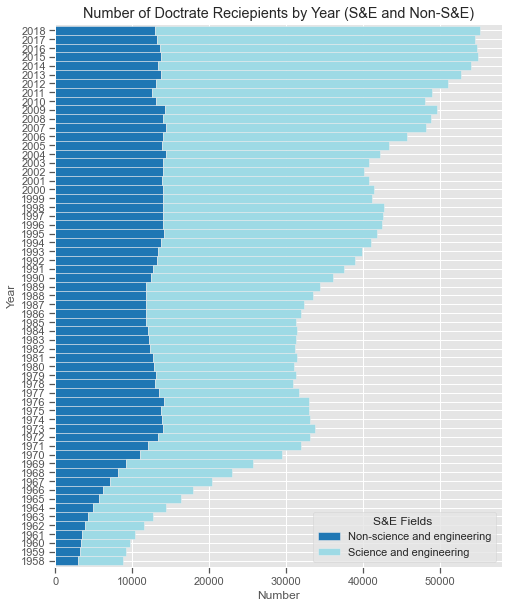

In [19]:
p1 =  df1s.groupby(['S&E Fields', 'Year'])['Number'].sum()
p1 = p1.reset_index()
p1.head(20)
p1=p1.pivot(index='Year', columns='S&E Fields', values='Number')
p1.head(40)
p1.shape
# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p1.plot(kind='barh',colormap='tab20',figsize=(8, 10), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="S&E Fields ")
plt.title("Number of Doctrate Reciepients by Year (S&E and Non-S&E)")
plt.xlabel("Number")
plt.ylabel("Year")

In [ ]:
p2 =  df1s.groupby(['Broad Fields', 'Year'])['Number'].sum()
p2 = p2.reset_index()
p2=p2.pivot(index='Year', columns='Broad Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p2.plot(kind='barh',colormap='tab20',figsize=(10, 12), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Broad Fields ")
plt.title("Number of Doctrate Reciepients by Broad Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")

In [ ]:
p3 =  df1s.groupby(['Detailed Fields', 'Year'])['Number'].sum()
p3 = p3.reset_index()
p3=p3.pivot(index='Year', columns='Detailed Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p3.plot(kind='barh',colormap='tab20b',figsize=(15, 18), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Detailed Fields ")
plt.title("Number of Doctrate Reciepients by Detailed Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")
#plt.legend(title="Line", loc='upper left', handles=handles[::-1])

In [ ]:
# df1s['S&E Fields'].unique()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAf0AAAJgCAYAAACA3LqIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzdeVxU5eLH8S+rIKCIiLsYFm64ELlCpJVkaVr3dk1zTVMpU1MT8rqQu4JcFzZR06TUzNSyvHgrDbu4ZJbKr4REEDdUQEE2YRjm+f3BZWScYWRgBs7MfN+vF69ilnOeOaJnOOc8n7EQQggQERGRybNs6AEQERFR/eBOn4iIyExwp09ERGQmuNMnIiIyE9zpExERmQnu9ImIiMwEd/pkMM8//zxee+01yOVylduLiorQuXNn/PLLLwZZb0REBP72t78ZZNk1VVxcjOnTp6NHjx5466231O4/cOAAOnfurPzq1q0bBgwYgHnz5uH27dt6G0dKSgpOnz5dp2X88MMPuHXrVq2ee+PGDZXX2blzZ3Tt2hX9+/fHBx98gOzs7DqNrdL48eOxdu1avSzrwIED6Nevn16WBQBnzpxBcnJyrZ7buXNn/PTTT3Uew7p169CjRw9cvXpV7b5Dhw6ha9euuHDhQp3XQ9LHnT4ZVHJyMj799NOGHka9+/HHH3Hy5Ens2bMHGzZs0PgYZ2dnJCYmIjExEUePHkVERASys7Px1ltv4d69e3oZx3vvvYfLly/X+vk3b97E+++/j4KCgjqN47PPPlO+1p9++gmhoaFISkrCRx99VKflVoqIiMCMGTP0sqxXXnkF//73v/WyLKDiDYk+38jVxvvvvw83NzcsW7ZM5faCggKsXbsW48ePR69evRpodFSfuNMng2rbti0iIyNx48aNhh5KvSooKICrqyu8vLzg5uZW7eNatGiBFi1aoHXr1njmmWewefNmAMCWLVvqa6ha6avd5ezsrHytrVq1gr+/P2bPno3ExEQUFhbqZfmOjo56GClgZ2eH5s2b62VZUmFnZ4eQkBAkJiYiPj5eefu//vUv2NnZ4YMPPmjA0VF94k6fDGr8+PFo06YNPv74Y62PefTQbNXDmh999BFWrFiBBQsWoHfv3vD398e///1vfP/993jxxRfh7e2NuXPnQiaTKZ8vhMCKFSvg7e0NPz8/xMXFqSz/+PHjGDlyJHr27Ilhw4Zh//79yvsiIiLwzjvvYMqUKfDx8cHBgwfVxiyEQFxcHF566SX06NEDI0eOxPHjx5XPX7ZsGTIzM9G5c2ccOHCgxturcePG+Nvf/oYjR44ob8vIyMC7776LPn36oF+/fli0aJHKjjIlJQWTJk2Ct7c3/P39ER0drdyuN2/exPLlyzF+/Hjlofbo6Gj069cPU6dOBVBxePfVV1+Fl5cXnn76aQQGBioPu7/wwgsAgFdffRUREREAgAsXLmD06NHo0aMHAgICsHXrVigUihq/xkq2trawsLBQfl9YWIjFixejb9++6NevH2bNmoU7d+4o78/Ly8NHH32Evn37om/fvpg/f77yCMSjP0Nff/01XnrpJfTq1Quvv/46EhISlPdFREQgMDBQ+fPh7++vcjTq0cP7V65cwZQpU9CrVy8MHjwYoaGhyp+1ym165MgRvPzyy/D29sb48eORnp4OoOIUFwAEBgYqj2pERUXhueeeQ48ePfDaa68pf26qk5SUhFdffRU9evTApEmTkJmZCQDYunUrBg0apPLG7Ndff0Xv3r1RVFSkthx/f3+88sorWLNmDUpKSnDx4kXs3bsXy5cvR+PGjVFWVoZ169bB19cXPj4+mDJlivJ1AEBOTg7mzZuH/v37w8vLCy+++CL27dunvP/5559HaGgoBg0ahOeeew7379/X+rqogQgiAxk8eLD47LPPxK+//io6d+4svvvuOyGEEIWFhcLT01OcPn1aCCHEuHHjxJo1a1Se6+npKY4dOyaEECI4OFh0795dREdHi2vXrokFCxaI3r17i1GjRok//vhD/PTTT6Jnz55i3759QgghNm3aJDw9PcWsWbNEamqq+Oabb0TPnj3FN998I4QQ4tKlS6Jnz55i9+7d4urVq+Lw4cOiT58+yvFVPj86OlpcvnxZ3L17V+21RUdHi2eeeUZ89913Ij09XWzatEl07dpVJCcni8LCQrF582bh7+8vsrKyxIMHD9Sev3//ftG3b1+N2y0+Pl54enqKgoICkZubKwYMGCBmzpwp/vrrL/HLL7+IoUOHipkzZwohhLh7967o27evmD9/vkhNTRXHjx8XzzzzjPjyyy9Fbm6u8Pf3F5s3bxa5ubni+vXrwtPTU/zjH/8Q6enp4tKlS+K3334T3bt3FwcPHhQ3btwQJ0+eFM8995xYtmyZEEKICxcuCE9PT/HLL7+IwsJCkZOTI3x8fERkZKS4cuWKSEhIEIMGDRKxsbEaX0vlOv/66y+V2y9duiQCAgLE1KlTlbfNmTNHjB07Vly4cEH89ddfYtasWWL48OGirKxMCCHE2LFjxeuvvy5+//13cfHiRfHaa6+JefPmqf0M/fzzz8LHx0d899134urVq2LPnj2iR48e4vfff1f++Xbv3l2899574tKlS+LgwYOiR48e4sCBA2p/NiUlJWLw4MEiJCREpKWliTNnzojhw4eLxYsXq7y+YcOGiTNnzogLFy6Il156SUyfPl355+Pp6Sm+/vprkZ+fL77//nvRt29f8csvv4jr16+Lf/3rX6J3796ioKBA4/bz9PQUPj4+Ij4+Xly6dElMnTpVBAQEiPLycnH79m3RpUsX8euvvyofv3jxYjF37lyNyxJCiKysLPHMM8+IqKgoMXbsWLFgwQLlfevWrRPDhw8Xv/zyi7h8+bJYvny5GDhwoMjPzxdCCDF58mQxadIkkZycLDIyMsTKlStFt27dRFZWlhCi4u/7M888Iy5cuCCSkpKqHQM1LO70yWAqd/pCCLFo0SIxcOBAkZeXV6ud/iuvvKK8r3JHdOLECeVt48aNE6tXrxZCVPyj3qdPH1FUVKS8f+XKleLNN98UQggRFBQkFi5cqLK+mJgY8frrryuf37NnT1FeXq7xdSkUCtGvXz+xbds2ldunTJmi/Af3s88+E4MHD65222jb6Z84cUJ4enqK27dvi88++0z069dP5Y3D+fPnhaenp0hPTxeff/65GDhwoCgtLVXe/+2334rDhw8LIVT/DCp3UJVvboQQ4s8//1Tu7CotW7ZMTJgwQeU5lTvtjRs3ikmTJqk8/tChQ9W+lsrn9+zZU/Tu3Vv07t1bdO/eXfj4+IiPPvpI5OXlCSGEuHbtmvI1VyotLRW9e/cWx44dE5cuXRKenp4iOTlZeX9SUpKIiooSQqj+DI0dO1ZER0erjGPRokXKN0qbNm0SPj4+KjvaFStWiDfeeEMIofpn89VXX4mAgAChUCiUj/3tt99Ely5dREFBgcZtunPnTuHr66v8vurP8o4dO4Svr6+4fv268jX+97//1fjGsPK5MTExyu/v3r0runfvLhITE4UQQowfP14sXbpUCCGETCYTffv2FT/99JPGZVXavXu36Natm/D19RX3798XQgjx4MED4eXlJc6ePavy2ICAAOXPz86dO8W1a9eU9927d094enoq33QMHjxY+WaIpMu6oY80kHmYP38+jh07hnXr1tXq4q0OHToo/9/Ozg4A0L59e+Vttra2Kof3PT090bhxY+X3PXr0UB5mT01NxaVLl3D48GHl/XK5HNbWD/86tGvXDpaWms9+3b17F7m5uejdu7fK7T4+PiqH5Wur8tC9g4MDUlNT0bVrV+VrrnwtNjY2SEtLw+XLl9G5c2fY2toq7x8+fLjW5Vfdbt26dYOdnR0iIyORnp6OtLQ0pKamwsfHR+NzL1++jDNnzsDb21t5m0KhQElJCXJzc9GsWTONz9u0aRM6duyI3NxchIeH48GDB5gzZw6aNm2qXC4ADB06VOV5Dx48wJUrV1BSUgIbGxt07txZZTv06NFDbV2pqam4cOGCynURZWVleOKJJ5Tfd+3aVeUagJ49e6ocqq76eq9fv46nn35aeZsQAgqFAhkZGXB2dgYAdOzYUXm/o6Oj2oyVSiNGjMDBgwfx4osvonv37nj++efx97//XeXP91FVf85cXFzQtm1bpKamwtfXFyNHjkR4eDgWLlyIxMREWFhYwNfXt9plAcDo0aMRFRWFSZMmoUmTJgCAa9euQSaTYcqUKSqnXEpLS3HlyhUAwJgxY3DkyBHs2LEDGRkZuHjxIgCgvLxc+fiqf09JmrjTp3rRpEkT/POf/8S8efMwZMgQrY/V9A+mjY2N2m1V/3F61KM7bIVCoVxGeXk5xo8fj9GjR1f7/EaNGlV7X3X/QFfuDOrq4sWLaN++PRwdHbXuDCpfk7btoEnVZZ48eRLTpk3DsGHD0KdPH0yaNAmHDh3CX3/9pfG5crkcAQEBGi/8cnJyqnadrVu3hru7O9zd3RETE4PXX38d77//Pnbv3g1ra2uUl5fDxsYGBw8eVHs9TZs2xdmzZ2v8OsvLyzFv3jwMHjxY5faqb+qsrKxU7lMoFBrf5MnlcvTu3RurV69Wu69ly5bIyckBoP7zKaq5ANLFxQUHDhzAqVOnkJCQgIMHD2Lnzp34/PPP4enpqfE5msZaub6XXnoJy5Ytw5kzZ/Ddd9/h5Zdf1vh3pSoLCwvY2tqq/BxU7ri3b9+udhGjo6MjhBCYMmUKsrKyMGzYMAwYMABPPvmk2ps0bT+vJA28kI/qzbBhw+Dn54elS5eq3G5ra6syJez69et1XldaWprKbyAXLlzAk08+CQDo1KkTrl69qtwJubu748yZM9i9e3eNlu3o6Ag3NzecP39e5fZz587Bw8OjTuMuLS3FoUOH8PLLLyvHmpKSgpKSEuVj/vjjD5SVlcHDwwMdO3bEX3/9hbKyMuX9UVFRmDVrVo3W98UXX+CVV17B2rVrMWbMGPTs2RNXr15V7rQe3dF26tQJ6enpKtsuLS0NUVFR1R4ZeZSjoyOWL1+OCxcuYOfOnQAADw8PlJWV4cGDB8rltmjRAqGhocjIyMATTzwBmUymMv3wzJkzeO6551SO8FSO8ebNmypjjI+PVzmyk5qaqvK8//u//0OXLl3Uxlr5s9KqVSvlsu7fv4/w8HCVbV5T33//Pb744gv4+flh0aJFOHLkCBwcHLRezFf1DVhWVhZu3bql/Fl2dHTE4MGD8eOPP+K///0vXn31VZ3HBFT8hm5tbY179+4pX2eHDh0QERGBpKQkXL58Gb/88gu2bt2KmTNnYsiQIcq/s9W9wSFp4k6f6tXHH3+Mu3fvqtzm5eWFw4cP4+zZs0hJScHSpUtVDlfXxr1797Bw4UJcvnwZBw4cwL59+5RXq0+ePBkJCQnYvHkzrl69iv/85z9YtWqVTtO0pk2bhs2bN+Pw4cPIyMhAdHQ0EhMTMX78eJ3GmZ2djezsbNy+fRtnzpzBlClTAADvvPMOgIqr5hs1aoSgoCBcunQJZ8+excKFCzFw4EA8+eSTGDFiBMrLy7F06VKkp6fj+PHj2LlzJwYNGgSg4hRBWlqa2jav5OzsjKSkJPz555+4cuUK1q9fj59//lm5Q6w8RZKcnIyCggKMHTsWV69exYoVK5Ceno6TJ09iyZIlsLe3r/FOHwD69++PESNGIDIyEnfu3IGHhweef/55BAUF4ezZs0hLS0NwcDAuXLgADw8PdOrUSbmj/OOPP/Dnn39izZo1GDBggNrPyjvvvIMvvvgCe/bswbVr1/Dll18iIiICbdu2VT4mJydHuc0OHjyIL7/8EhMnTlQb54gRI2BpaYng4GBcunQJ586dw4IFC1BcXKz1yEZVjRs3RmpqKvLy8lBeXo6wsDD85z//wc2bN/H9998jOzsbXl5e1T4/MjISP/30E/766y8EBwejW7duKrMLRo4ciX379sHJyUnlNIQuHBwcMGbMGKxcuRLHjx/H1atXsWzZMhw9ehSdOnVCkyZNYGVlhcOHD+PmzZs4ceIEgoODAUDtTRdJGw/vU71q164d3n//fYSFhSlvmzx5MtLT0zFlyhQ0a9YMs2bNws2bN+u0noEDB8La2hpvvPEGmjZtikWLFsHf3x9AxZuMTZs2YdOmTYiMjESLFi0wbdo05ZuCmhg3bhyKi4sRFhaGu3fvwtPTE5s3b8YzzzxT42Xk5eXBz88PQMXh4ZYtW8Lf3x/h4eHKc9329vbYtm0bVq1ahTfeeAONGzfGSy+9hPnz5wOo+E1v69atWLVqFUaOHAlXV1cEBgYqi4QTJkzA6tWrce7cOURGRqqNYdasWfjnP/+JcePGoVGjRvD29kZwcDAiIyNRWlqKZs2a4Y033sCiRYswevRoLFy4ENu2bcO6deswcuRING3aFK+88go+/PDDGr/uSh999BESEhKwatUqbNy4EWvXrsXq1asxY8YMyGQy9OrVC9u3b1eedw4LC8Py5csxYcIE2NjYICAgQOP1IUOGDMHixYvxySefYOXKlWjbti1CQkIwbNgw5WMqr4P429/+BldXV4SEhOCll15SW1bjxo2xfft2rF69Gv/4xz9gZ2eHwYMHY8GCBTV+nVOmTEFUVBQuXLiAqKgoZGZmIjQ0FHfu3EGbNm2wZMkSDBgwoNrnBwYGYs2aNbh16xYGDBiANWvWqNz/7LPPwt7e/rHXcjxOUFAQrK2t8c9//hOFhYXo0qULtm7dqjxPv2zZMkRHRyM6Ohpt27bFW2+9hX379uHPP/9U/t0i6bMQPDZDRGYkIiICP/30k079BCm7f/8+/Pz88PXXX6NTp04NPRySOP6mT0RkhB48eIDjx4/j8OHDePrpp7nDpxrhTp+IyAhZWVlhyZIlaNasGWJiYhp6OGQkeHifiIjITPDqfSIiIjPBnT4REZGZ4E6fiIjITJjFhXyVH0VJNdOmTRtuMx1xm+mO20x33Ga6M8dt1qZNm2rvM4sL+e7892hDD8Go2DZqBFlpqd6Xm+Xqjmy5ab7PtG1kC1kpy2S64DbTHbeZ7qS+zVwdrOFqp9+D7tp2+gb9F3jfvn04deoUAODpp5/GuHHjkJSUhLi4OMhkMgwcOFDtQ08iIyPh5eWlzIhmZWUhKioKxcXFcHBwwIwZM9CiRQudxiFbE6yX12MuDPXXIzskDsHHrxlo6URExmftUA+42tUtO64Lg53TT0pKQlJSEkJDQxEaGor09HQkJiYiJiYGQUFBWL9+PdLS0nDu3DkAFa30NWvW4PTp0yrL2bt3L3x9fREWFoZ+/fphz549hhoyERGRSTPYb/rNmjXD+PHjlR9n2bZtW9y6dQutW7eGm5sbgIpm9KlTp+Dt7Y3ExET06dNH7UMsFAoFiouLAVR8All1H8RSVFSEoqIitdsr10VERGTuDLbTb9++vfL/b926hVOnTmHo0KFwdnZW3u7s7Ix79+4BqPg0KwBISUlRWc6bb76JxYsXIz4+HnK5HCtXrtS4vsOHD+Orr75Su/3LL7+s82sh/bC01O1z34mITJ1tI1ut5+D1zeBXVV2/fh1r1qzBuHHjYGVlhVu3bqnc/+jndT8qKioK06ZNQ58+fXD69GmEhYVh3bp1as8bNmyY8joAkiaFwuSvGSUi0omsVKb32QXa3kQYdJ5+SkoKli1bhrfeeguDBg1C8+bNkZeXp7w/Ly8PzZo1q/b5+fn5yMzMRJ8+fQBUfAZ3Xl4eCgoK1B7r4OAANzc3tS8iIiKqYLCdfk5ODsLCwjB79mz4+voCAJ588klkZmbi9u3bUCgUSExMhLe3d7XLcHJygo2NDZKTkwFUvImwt7dXfr42ERER1ZzBDu9/++23KCsrw86dO5W3DRkyBO+99x7Cw8Mhk8ng7e2N/v37V7sMCwsLfPjhh9i+fTtkMhns7e0xb948Qw2ZiIjIpJlFnCfr+28beghGxcLSEkKh0Pty77TshOz/NX/KbBqhTJjOhX2G2mamjNtMd9xmupPSNrOxsoDNIxc013ecx6A7/brGee7fv48VK1Yo7ysuLkZ+fj4+++wzncZxfdgzdX8xpFepIXEIPn67oYdBRFRv1g71QJfmhg/xNEiRr2qcBwBWrVqFxMRE7Nq1C0uXLkXz5s2xZs0anDt3Dt7e3rh37x62bNmCP/74A15eXgCApk2bIiwsDEDFfP3ly5djzJgxhhoyERGRSZN8nKdSQkICbG1t4efnp/F+xnmIiIi0k3ycB6j4Lf/AgQMICgqqdn2M8xgXhnqIyNzUd4hHE8nHeQDg/PnzaN26NTp06FDtYxjnMS4M9RCRuTFEiEeTBvuUvZSUFISHh2PSpEnw9fXFxYsXdYrzVDpz5gwGDhyo9TEODg5wcHCo85iJiIhMlaTjPJVSU1PRtWtXQw2ViIjILEg6zlPpzp07cHFxMdRQiYiIzALjPKSmPmIWlaEeU4n0SCkAYiy4zXTHbaY7KW2zJnbWkJcrDBLkqcpo4zwAkJubi82bNyM3NxeNGjXCzJkzdZ6GxziPdDHSQ0TmxtCRngb5lL2qcZ7Q0FCkp6cjMTERMTExCAoKwvr165GWloZz584BAO7du4c1a9bg9OnTKsuJjIyEj48PQkND8eyzz2LXrl2GGjIREZFJk3ScJz8/HxkZGVi0aBEAYPDgwejRo4fG9THOQ0REpJ2k4zx37tyBq6sr4uLikJKSgqZNm2LKlCka18c4j3FipIeIzE1DRnokHecpLy9HRkYGRo0ahYkTJ+Lo0aOIiorCxx9/rPZYxnmMEyM9RGRuDB3pMdo4j7OzM+zs7ODj4wMA8PPzw44dOzQ+lnEeIiIi7SQd52nVqhWaN2+uvNjvt99+g4eHh6GGTEREZNIMNmVvx44d+Omnn9CyZUvlbUOGDEHr1q2VU/a8vb0xceJElUP8UVFR6N69u/JQfWZmJrZs2YKCggLY29tjxowZaN26tU5j4Tx93dTnvNY7LTshU2H8c/WlNBfYWHCb6Y7bTHdS3GZujjZo52hlsOU3yOH9t99+G46Ojirz9AMCApCUlAQhBIQQsLOzUzun/+h7kEuXLiEzMxNNmzZFaWkpEhISMGbMGJ3GUrpxad1eDBmMM4DskDgs4lx9IjITa4d6AAbc6WtjsJ1+1Xn6ALBq1SokJiZi165dWLp0KZo3b441a9bg3Llz8Pb2xr1797Blyxb88ccf8PLyUi4nPT0dEyZMgJ+fn6GGSkREZBYkPU8fANLS0nDr1i0cPHgQ7u7umDx5MhwdHQ01bCIiIpNlsAv52rdvD09PTwAP5+lbWFhonaf/wgsvqC3H2dkZf//737Fu3Tq4urpi+/btGtdXVFSErKwstS8iIiKqIOl5+gAwf/585f+PGDECM2fO1Pg4xnmMFwM9RGROTDbOU9d5+sXFxTh27BiGDx+uvM3KSvPFD4zzGC8GeojInJhknKdynv6cOXOUF+ZVnafv5uaGxMREDB48uNpl2NnZ4dChQ+jcuTOeeuopHDlyBH379tX4WMZ5iIiItDPYTv/bb79FWVkZdu7cqbxtyJAheO+99xAeHq6cp9+/f/9ql2FpaYk5c+Zg27ZtkMlkaN26Nd5//31DDZmIiMikGSzOIyWM8+imPmIWd1zdkS2veM9p3bgx8mXSimfoSooBEKnjNtMdt5nuGmqb2VhZwKaa65VcHazhamew6+gbrr2/b98+lTjPuHHjkJSUpCzyDRw4EKNHj1Z5TmRkJLy8vNTOz1+5cgULFy7E7t27dR4H4zzSkx0Sh2AGeYjIRK0d6oEuzW0behhqDPZWo2qcJzQ0FOnp6UhMTERMTAyCgoKwfv16pKWlKbv69+7dw5o1a3D69Gm1ZZWWlmL79u2Qy+WGGi4REZHJM9hOv2qcx9raWi3OY2VlpYzzAFDGeQYMGKC2rLi4OAwbNsxQQyUiIjILBju83759e+X/V8Z5hg4dqjXOA1RM86vq7NmzKC0t1XrBH1AR5ykqKlK7vbL+R0REZO4kHefJy8vD/v37sXjx4seuh3Ee48IgDxGZsoYM8Ggj6TjPb7/9hsLCQoSEhChvmz9/PpYtWwZ7e3uVxzLOY1wY5CEiU2boAI82RhvneeGFF1R6/KNGjUJYWJjGxzLOQ0REpJ2k4zxERESkP4zzkJp6ifO07ITs0or/L7NphDJh3Of4GU3RHbeZ7rjNdGeIbaYtvFPJ0AEebbQd3jfoTl8fcZ7k5GR8+umnkMvlcHNzw4wZM+Do6KjTOK4Pe0Yvr4cMI5WhHiIyIlIN71TSttOXfJwnOjoaM2fORHh4ONq1a4dDhw4ZashEREQmzWDn9KvGeQCoxXkAKOM83t7eyjiPk5OTynLWr18Pa2tryOVy3Lt3D+7u7oYaMhERkUmTfJzH2toa165dw/Lly2FlZYUxY8ZoXB/jPERERNpJOs5TqUOHDti6dSt++OEHbNiwAStWrFB7DOM8xouhHiIyJlIN79SEpOM8MpkM58+fR9++fQFUnA6Ii4vT+FjGeYwXQz1EZEwaMrxTE0Yb57G2tsYnn3wCV1dXeHh44NSpU+jSpYvGxzLOQ0REpJ2k4zyWlpaYM2cOYmNjoVAo4OLigsDAQEMNmYiIyKQxzkNqDBkAuePqjmy56ntN68aNkS8z7uAIoym64zbTHbeZ7rRts5pEdjRpyPBOTTTI4X1AP3GelJQU7Ny5E3K5HE5OTnj33XfRokULncZRunGpXl4P1V02QzxEJBFSj+wYguTjPBEREQgMDERYWBj8/PywY8cOQw2ZiIjIpEk6zlNWVoY333xTGeRxd3fHkSNHNK6P8/SJiIi0k3Scx8bGBv7+/gAAhUKBffv2oU+fPhrXx3n6xoFz8olIKox5vn1tGUWcRy6XIzIyEuXl5Xj99dc1Pobz9I0D5+QTkVRIfb59bTXYhXx1jfMAQElJCdauXQsnJycEBQUpTxc8ivP0iYiItDPYhXyVcZ7Zs2fD19cXgGqcR6FQIDExEd7e3lqXs2nTJrRq1QoffPABbGxsDDVcIiIikyfpOM+VK1dw9uxZtGvXDsHBwQAAFxcXLFiwwFDDJiIiMlmM85AafQZAHo3xmEKIRxNGU3THbaY7bptsF8gAACAASURBVDNVNYnr2DayhaxUpvE+qUd2aqvBzukD+gn0AMCxY8eQnJyMGTNm6DwGxnkaDmM8RGQoNYnrtGnTxiQv1qstg77F0UegRyaTYdeuXfj0008NOVQiIiKTZ9Df9PUR6ElOToYQAuPGjUNqamq162Kch4iISDuD7vT1Eejp1asXevXqhYSEBK3rYpxHmhjjISJDqWlcx9wCPNoY/Jw+oJ9Az+MwziNNjPEQkaHUJK5jjuf0G/RCPn0EemqCcR4iIiLtDHohn74CPURERFR3Bv1NXx+BHiIiItIPxnlIjV7jPC07Ibv04fdlNo1QJkzv4j5GU3THbaY7c91m1UV4ahLX4Tl9VQb9TV8fYZ6cnBxERETg/v37aNOmDWbNmgU7OzudxsE4T8Nx/t9XpdSQOCxirIeIdFCTCA/VjMHO6esjzAMA27ZtQ0BAADZs2AAPDw+N0/KIiIjo8Qy2068a5rG2tlYL81hZWSnDPACUYZ4BAwYolyGXy5GcnKw85z9o0CC1NwWVioqKkJWVpfZFREREFQx2eF8fYZ6CggLY29vDysoKQMUbibt372pcH+M8xoGxHiLSVU0jPNVhnOchg8/Tr0uYRwihdr+lpeaDE4zzGAfGeohIVzWJ8FSHF/KpMuhOv65hniZNmqC4uBgKhQKWlpbIzc2t9vGM8xAREWlnsHP6+gjzWFtbo0uXLjh58iQA4Oeff0bv3r0NNWQiIiKTZrDf9PUV5nnnnXcQFRWF/fv3w9XVFbNnz9Z5LI1mh+j8HHNmyLnALRoBa59rpfUxxjiX31znT9cFt5nuzHWbWVtZIuWurEaPrcncfXNmsJ3+22+/DUdHR5V5+gEBAUhKSoIQAkII2NnZKc/ZZ2RkYPPmzXjw4IHyyn4rKyvcv38fpaWlsLKygpWVFeRyuc5j4Tx96Xh03r4mnMtPRLW1dqgHXO04p786kpmnHxERgcmTJ2Pjxo0QQuDo0aMQQiA8PBxjx47FunXr4O/vj9jYWEMNmYiIyKRJYp5+dnY2ZDIZPD09AVTMxz916hQKCgogk8ng5eUFAPDx8cH58+dRVlZmqGETERGZLIPt9Nu3b6/ciVfO07ewsNA4Tz83N1fl9mbNmuHevXtwcnKCnZ0dLly4AAA4ceIEysvLUVBQoLY+xnmIiIi0k8Q8fYVCoTIfv3J+voWFBebNm4e4uDjs2rUL/v7+cHJygrW1+rAZ5zEdDPgQUW1pCvkwzvOQJObpN2/eHLm5uWq3A4CVlRU+/vhjAMD9+/exf/9+ODo6qq2LcR7TwYAPEdXWoyEfxnlUSWKefosWLWBra6tM8P7888/K+fvR0dG4fPkyAOC7775D//79NVb5HBwc4ObmpvZFREREFSQzT3/mzJmIjY3FgwcP8MQTT+Dll18GAEydOhVbt25FaWkpOnTogHfffddQQyYiIjJpFkIIkz+WmvX9tw09BKPSkAGQO67uyLVtgnyZcQVIzDWaUhfcZrrjNnvIxsoCNhqu/3k0zsPD+6oMek5/3759KnGecePGISkpCXFxcZDJZBg4cCBGjx4NQDXO07VrV0ydOhVWVlbIyspCVFQUiouL4eDggBkzZqBFixY6jYNxHuORHRKH4KPpDT0MIpK4tUM90KU5Izy6knScBwD27t0LX19fhIWFoV+/ftizZ4+hhkxERGTSJB3nAQCFQoHi4mIAQGlpKWxt+c6OiIioNgx2eL99+/bK/6+M8wwdOlSnOA8AvPnmm1i8eDHi4+Mhl8uxcuVKjesrKipCUVGR2u28gp+IiKiCpOM8ABAVFYVp06ahT58+OH36NMLCwrBu3TqVxwOM85gKhnmIqCY0RXiqwzjPQ5KO8+Tn5yMzMxN9+vQBAPTv3x9bt25FQUEBmjRporIuxnlMA8M8RFQTj0Z4qsOr91VJOs7j5OQEGxsbJCcnA6h4E2Fvb6+2wwcY5yEiInocScd5LCws8OGHH2L79u2QyWSwt7fHvHnzDDVkIiIik8Y4D6lp0DhPy07ILgXKbBqhTBjP+X1GU3THbaY7c91mmkI8j0Z4qsPD+6okHecpLCzEihUrlMsrLi5Gfn4+PvvsM53GwTiP8XD+31dqSBwWHb/d0MMhIglgiEd/DLbTrxrnAYBVq1YhMTERu3btwtKlS9G8eXOsWbMG586dg7e3NyIiIjB9+nR4enoiJiYGR48eRUBAAMLCwgBUzNdfvnw5xowZY6ghExERmTTJx3kqJSQkwNbWFn5+foYaMhERkUmTfJwHqPgt/8CBAwgKCqp2fYzzEBERaSf5OA8AnD9/Hq1bt0aHDh2qXQ/jPKaFkR4iqqRLiEcTxnkeknScp9KZM2cwcOBAretinMe0MNJDRJVqGuLRhFfvq5J0nKdSamoqunbtqnV9jPMQERFpJ+k4T6U7d+7AxcXFUEMlIiIyC4zzkJoGjfO4uiNbbg3rxo2RLzOeCIm5RlPqgttMd8a0zTQFdWqrpiEeTXh4X5Wk4zxWVlbIzc3F5s2bkZubi0aNGmHmzJk6H7ZnnMd4ZIfEIZhRHiKjx6CONBnsnH7VOE9oaCjS09ORmJiImJgYBAUFYf369UhLS8O5c+cAABEREZg8eTI2btwIIQSOHj0KAIiMjISPjw9CQ0Px7LPPYteuXYYaMhERkUmTdJwnPz8fGRkZGDJkCABg8ODByiMDjyoqKkJWVpbaFxEREVWQdJznzp07cHV1RVxcHFJSUtC0aVNMmTJF4/o4T980cH4+kWmo69x6fZLKOKRA0nGe8vJyZGRkYNSoUZg4cSKOHj2KqKgofPzxx2rr4Tx908D5+USmoS5z6/WJF/KpknScx9nZGXZ2dvDx8QEA+Pn5YceOHRrX5eDgAAcHB0O+HCIiIqMm6ThPq1at0Lx5c+XFfr/99hs8PDwMNWQiIiKTJvk4z4cffogtW7bg888/h729PWbMmGGoIRMREZk0xnlITUMEQIw1ylPJmKIpUsFtprv62mb6COvUJaijTzynr0rycZ6EhATs3r0bTZs2VS5nzJgxOo2DcR7pY5SHSDoY1jFdBtvpV43zAMCqVauQmJiIXbt2YenSpWjevDnWrFmDc+fOwdvbGxEREZg+fTo8PT0RExODo0ePIiAgAOnp6ZgwYQL8/PwMNVQiIiKzYLCdftU4DwC1OA8AZZynXbt2anGeL7/8EgEBAUhLS8OtW7dw8OBBuLu7Y/LkyXB0dFRbX1FREYqKitRu5yftERERVZB0nKfyMa+++io6d+6MPXv2YPv27Zg1a5ba+hjnMW6M8hBJh5TCOvpgSq+lriQd5wGA+fPnK28fMWIEZs6cqXE9jPMYN0Z5iKRDKmEdfeCFfKokHecpLi7GsWPHMHz4cOV9VlZWGtfFOA8REZF2ko7z2NnZ4dChQ0hNTQUAHDlyBH379jXUkImIiEyapOM8lpaWmDNnDrZt2waZTIbWrVvj/fffN9SQiYiITBrjPKSmQeI8LTshu/Th92U2jVAmjOfiPoZmdMdtpru6brOaRnekEtbRB57TVyX5OE+lK1euYOHChdi9e7fO42CcR/qc//dVKTUkDosY6yHSK0Z3yGBv5arGeUJDQ5Geno7ExETExMQgKCgI69evR1pamvLDdCIiIjB58mRs3LgRQggcPXpUuazS0lJs374dcrncUMMlIiIyeQbb6VeN81hbW6vFeaysrJRxnuzsbLU4T+URAgCIi4vDsGHDtK6vqKgIWVlZal9ERERUQfJxnrNnz6K0tFR5wV91GOcxLYz1EOmfqUV3asocX3N1JB3nycvLw/79+7F48eLHrodxHtPCWA+R/plSdKemeCGfKknHeX777TcUFhYiJCREed/8+fOxbNky2Nvbq6yLcR4iIiLtDLbTr4zzzJkzB15eXgBU4zxubm5ITEzE4MGDVeI8Xbp0UcZ5XnjhBbzwwgvKZY4aNQphYWGGGjIREZFJk3ScR18azQ55/INIqSHnT99xdUe23BrWjRsj5IWODTKG2uCcc91xm+muum2my/x7Mm8G+wl4++234ejoqDJPPyAgAElJSRBCQAgBOzs7tXP5Qgg0atQIlpYVEwuSk5Px6aefQi6Xw8fHB4WFhRo/WlcbztM3HtkhcQjm/HwinXD+PdWU5OfpR0dHY+bMmQgPD0e7du1w6NAhQw2ZiIjIpEl+nv769evRrl07yOVy3Lt3T+ff8omIiKiC5OfpW1tb49q1a1i+fDmsrKwwZswYjesrKipCUVGR2u1ubm76eklERERGTdLz9Ct16NABW7duxQ8//IANGzZgxYoVauthnMc0MMpDpDtzje7UFLfNQ5Kepy+TyXD+/Hn07dsXAPDss88iLi5O47oY5zENjPIQ6c4cozs1xTiPKknP07e2tsYnn3wCV1dXeHh44NSpU+jSpYvG9THOQ0REpJ2k5+lbWlpizpw5iI2NhUKhgIuLCwIDAw01ZCIiIpNmIYQw+eOpWd9/29BDMCoNFU254+qOXNsmyJcZX7CFoRndcZvprpGtNayE+jZzdbCGq53BJmMZNR7eV2XQc/r79u1TifOMGzcOSUlJiIuLg0wmw8CBAzF69GgAQEZGBjZv3owHDx6ga9eumDp1KqysrJCSkoKdO3dCLpfDyckJ7777Llq0aKHTOBjnMQ7ZIXEIPpre0MMgkqz1I7vAg7OWqQ4kH+eJiIhAYGAgwsLC4Ofnhx07dhhqyERERCZN0nGesrIyvPnmm3B3dwcAuLu7Iycnx1BDJiIiMmmSjvPY2NjA398fAKBQKLBv3z706dNH4/oY5yEiItLOKOI8crkckZGRKC8vx+uvv65xPYzzGD+GeYgej6EZ3XGbPSTpOA8AlJSUYO3atXByckJQUBCsrTUPmXEe48cwD9HjmduV6HXFq/dVSTrOAwCbNm1Cq1atMHXqVOXH7WrCOA8REZF2ko7zXLlyBWfPnkW7du0QHBwMAHBxccGCBQsMNWwiIiKTxTgPqWmIaIoxh3kAhmZqg9tMd80cbFEqk6vcxjCPdjy8r0rycZ5KX3zxBSwtLTFq1Cidx8E4j/QxzENUO2uHesDVzrahh0FGQvJxnuLiYsTExOC7774z1FCJiIjMgqTjPADw66+/onXr1hg+fLihhkpERGQWJB3nAYDnnnsOwOPn2zPOQ0REpJ1RxHlqgnEe48YwD1Ht2DayZXzmMbh9HpJ8nKemGOcxbgzzENWOrFRmdlen64JX76uSfJynphjnISIi0k7ScR4iIiLSH8Z5SE2DxHladkKmohHKhHGe22doRnfcZrrTtM2a2FlDXq56G4M9D/HwvirJx3lycnIQERGB+/fvo02bNpg1axbs7Ox0GgfjPNLnjIpAz6Ljtxt6KERGj8Eeqo7k4zzbtm1DQEAANmzYAA8PD41X6BMREdHjSTrOI5fLkZycrDzvP2jQIJw+fVrj+oqKipCVlaX2RURERBUkHecpKCiAvb29ssHfrFkz3L17V+P6OE/f+HGuPpF+cO6+Km6LhyQd59EU6bG01HxwgvP0jR/n6hPpB+fuP8QL+VRJOs7TpEkTFBcXQ6FQwNLSErm5udVGezhPn4iISDuDndOvjPPMnj0bvr6+AFTjPAqFAomJifD29laJ8wBQxnmsra3RpUsXnDx5Unl77969DTVkIiIikyb5OM8777yDqKgo7N+/H66urpg9e7ahhkxERGTSGOchNQ0VTclo54WsEuP8cWRoRnfcZrp73DazsbKAjaUF4zxV8Jy+KoOe0y8uLsbixYsRHBwMNzc3JCQk4JtvvoGlpSW8vLwwYcIEWFlZ4fLly/jkk09QVlYGV1dXBAYGwtnZGXl5edi8eTOys7NhZ2eHiRMnKqf16YJxHuNQGBKHpYzzENXa2qEe6NKcUR6qnsHeCqampmLJkiXKd1iZmZn44osvsGTJEoSHh6O8vBzx8fEQQiA8PBxjx47FunXr4O/vj9jYWABAXFwcPDw8EB4ejlmzZiEiIgIymcxQQyYiIjJpBtvpHz16FFOmTIGLiwsA4OrVq/D09FReff/000/j119/RUFBAWQymfKT+Hx8fHD+/HmUlZUhIyMDAwYMAAC0bNkSjo6OuHTpksb1Mc5DRESkncEO7wcGBqp87+7ujri4OOTk5MDFxQWnT59GXl4enJycYGdnhwsXLqBXr144ceIEysvLUVBQgCeeeAInTpzA6NGjce3aNdy4cUNlyl9VjPMYP8Z5iOqGUR7NuE0eMnicp1KbNm3w1ltvITQ0FLa2thgwYADS0tJgYWGBefPmIS4uDrt27YK/vz+cnJxgbW2NiRMnYvv27Zg3bx6eeuopdO/eHdbWmofMOI/xY5yHqG4Y5VHHC/lU1dtOXyaT4cknn0RoaCgA4NSpU2jZsiUAwMrKCh9//DEA4P79+9i/fz8cHR2Rk5OD6dOnw97eHgAwd+5c5XMexTgPERGRdvU2p6O0tBTLli3DgwcPIJfLceTIEQwcOBAAEB0djcuXLwMAvvvuO/Tv3x+WlpY4cuQIfvjhBwDA+fPnoVAo4O7uXl9DJiIiMin19pu+k5MT/vGPf2DhwoUoLy+Hr68v/Pz8AABTp07F1q1bUVpaig4dOuDdd98FALz22mvYuHEjjh8/Dnt7e3z44YfVtveJiIhIO8Z5SE1DRVPutOyETEUjlAnju6CPoRndcZvp7nHbrImdNeTlNd+m5hDx4Tl9VZKO88jlckRHR+Pq1auwtLTE+PHj0bNnT53HwTiPcXAGkB0Sh0UM9BDVi7VDPeBqx5iPOZF0nOfnn3+GQqFAeHg4Zs6ciejoaEMNl4iIyORJOs6jUChQUlKi/K+tbfXvSBnnISIi0k7ScZ5BgwYhISEB06dPR1FRkdZP2GOcxzQw0ENUf8wl5mMOr7GmJB3n+fLLL+Hp6Ynly5fj1q1bWL58OTw8PNCiRQu15TPOYxoY6CGqP+YQ8+GFfKokHec5e/YsPvjgA1hYWKBNmzZ46qmncPnyZY07fcZ5iIiItJN0nMfd3R2//vorACA/Px9paWno2LFjfQ2ZiIjIpEg6zjNx4kRs2bIFc+fOhaWlJcaMGYPWrVvX15CJiIhMisHjPHWdq7927Vrk5OQAABQKBa5fv47Vq1ejU6dONR4D4zy6achoSkY7L2SVGN95fYZmdMdtpjt9bjMbKwu0drJhnMcENdg5/dTUVMTGxqrN1V+9ejWaNWuGbdu2IT4+HsOGDUN4eDhmzJgBLy8vnDx5ErGxsQgODkZwcLByeXv37oWnp6dOO3yAcR5jUhgSh6WM8xAZXEWYx7R3+KTOoH/i+pirXykzMxPHjx/H+PHjDTlkIiIik2XQnX5gYCC6du2q/N7d3R2pqanIycmBQqHQOFcfgMpc/UpfffUVRowYgcaNG2tcF+M8RERE2tXbhXxA7ebqA0BhYSGSkpLUgj9VMc5jGhjnIaof5hLmARjnqaped/q1masPAOfOnUPv3r21ZngZ5zENjPMQ1Q9zCPMAvJDvUfV6FUdt5uoDwKVLl1ROE2ji4OAANzc3tS8iIiKqUK+/6ddmrj4AZGVlwcfHpz6HSkREZHIMPk9fCjhPXzecp687zjnXHbeZ7vS1zcxljj7Aw/uPMvhv+nWN88jlcsTFxSElJQVyuRwTJ05Er169dBoD5+kbD87TJzI8ztE3Xwb9U09NTcWSJUvU4jxLlixBeHg4ysvLER8fDyEEwsPDMXbsWKxbtw7+/v6IjY0FAHzzzTcoKCjA2rVrMWfOHERHR8MMDk4QERHpneTjPCdPnsRrr70GCwsLtG/fHosXL+ZOn4iIqBYMenj/0Xn17u7uiIuLQ05ODlxcXDTGeXr16qUS57l9+zYuXryITz75BOXl5RgzZgzatWuntq6ioiIUFRWp3c4r+ImIiCpIPs6jUChw9+5dLF26FNeuXcPKlSuxYcMGtTIf4zymgXEeIsMzpzAPwDhPVZKP8zg7O8PX1xcWFhZwd3dH8+bNkZmZiSeffFJl2YzzmAbGeYgMz1zCPACv3n+U5OM8Pj4+OHnyJADgzp07yMnJ0fiCGOchIiLSTvJxnrfeegvbt2/H3LlzAVRcJ1Ddh+4QERFR9RjnITWM8+iOoRndcZvprjbbzMbKAjaPXCvj6mBtNvP0eXhfleTjPNnZ2Zg3b57y3L+zszMWLlyo0xgY5zEejPMQ6dfaoR7o0rz6Dysj82LQnX5qaipiY2PV4jyrV69Gs2bNsG3bNsTHx2PYsGEIDw/HjBkz4OXlhZMnTyI2NhbBwcFIS0uDn58fpk2bZsihEhERmTzJx3nS0tJw/fp1zJ8/Xzltj4iIiHRn0J1+YGCgykfiuru7IzU1FTk5OVAoFBrjPABU4jw2NjZ49tlnsXbtWrz66qsICwuDXC5XW1dRURGysrLUvoiIiKiC5OM8o0aNUj7/6aefxp49e3Djxg107NhRZdmM85gGxnmI9MvcQjyamPvrr0rycZ74+Hj4+fnByckJACCEgLW1+rAZ5zENjPMQ6Zc5hXg04dX7qiQf57l48SKOHTsGALh48SIUCgXjPERERLUg+TjP22+/jaioKPz888+wtbXF7NmzYWlpHvNLiYiI9IlxHlJT39GUO67uyJZXvP+0btwY+TLjC7YwNKM7bjPdPW6bmXuIRxMe3ldl0N/06xrmqfTgwQMEBQUhMDAQ3bt313kcjPNIW3ZIHIIZ5CGqM4Z46HEM9vYvNTUVS5YsUQvzLFmyBOHh4SgvL0d8fDyEEAgPD8fYsWOxbt06+Pv7IzY2VmVZn3zyCQoLCw01VCIiIrNgsJ2+PsI8AHDy5EnY29vD3d1d6/o4T5+IiEg7gx3eDwwMVPne3d0dcXFxyMnJgYuLi8YwT69evVTCPAqFAocPH0ZISAhWrVqldX2cp2+8ODefSD84J18zbpOH6u3qfV3DPFZWVoiKisKUKVNga/v4c1Scp2+8ODefSD/MfU6+JryQT1W97fR1DfMUFBQgMzMTMTExAIDbt29j8+bNmD59uvJUQFUODg5wcHConxdDRERkhOptHoeuYZ527dohJiYGYWFhCAsLQ6dOnRAYGKhxh09ERESPV2+/6dcmzENERET6wzgPqamPaIopBHmqYmhGd9xmNVcZ3bFtZAtZqazax5l7iEcTntNXZfDf9Osa6MnNzUVkZCTy8/NhY2ODadOmqX3C3uMwziM9DPIQ1VxldMccd2CkXwZ9S6iPQM+ePXvQr18/hIWFYdSoUdi2bZshh0xERGSyDLrT10egJzAwEC+++CIAICsrq9or9BnnISIi0s6gh/f1EeipfMPwwQcfIDs7G/Pnz9e4LsZ5jAuDPEQ1VzW6w9CM7rjNHqrXj9bVNdBjbf1weBs2bEBGRgZWrFiBDRs2wNHRUWXZjPMYFwZ5iGquMrrDc/q6M8dtJok4D6B7oMfR0RG///47unXrBjs7O3Ts2BEtWrTAnTt31Hb6jPMQERFpV69zO3QN9FhaWiIhIQE//vgjAODGjRvIy8tD27Zt63PYREREJqFef9OvTaBn0qRJiImJwfHjx2FjY4PZs2fDzs6uPodNRERkEhjnITX1EU3JaOeFrBLT+dFjaEZ33GaqKgM8mlRGd8zx/HRdmeM2M/o4T3R0NPLy8mBpaYnx48fr3N9nnEd6CkPisJRxHiKlygAPkSFJPs7z2WefwcfHB2FhYZg9ezY2btwIBX87ICIi0pnk4zx9+/ZVnvdv1aoVysrKUFJSorYuxnmIiIi0k3ycp3///srnHzp0CE888QQaN26sti7GeYwL4zxEqqoGeLRhaEZ33GYPGU2c5/Dhw/jxxx+Vc/kfxTiPcWGch0hVZYBHG3O8KK2uzHGbGXWcBwA+//xz/P7771i6dCmaN2+ucdmM8xAREWkn+TjP4cOH8eeff2L58uXV7vCJiIjo8SQd5xFC4KuvvoK9vb3KYf0FCxYoLw4kIiKimqmXefpVC3qWlpYQQsDa2hpFRUUoLy+HlZWV8j5ra2vIZDKUlpbC3t4eO3bsAAAkJSXh66+/xpIlS3QeQ6PZIfp5MWZC39GUO67uyJar/qhZN26MkBc66m0dDY2hGd2ZyzbTFt2pytWhXn8HIzNl0J+y1NRUxMbGqs3TX716NZo1a4Zt27YhPj4ew4YNQ3h4OGbMmAEvLy+cPHkSsbGxCA4OhkKhwOHDh3Hw4EF06NChVuNgnKdhZYfEIZghHjJTjO6QlEh+nv7Nmzdx8+ZNTJ8+3ZBDJSIiMnkG3ekHBgaia9euyu/d3d2RmpqKnJwcKBQKjfP0AajM02/fvj0CAwPVPkr3UYzzEBERaWc08/Qfh3Ee6WKIh8xZTaM7NcXQjO64zR4yinn6NcE4j3QxxEPmrCbRnZoyx9BMXZnjNtP2Jkfy8/RrysHBAW5ubmpfREREVEHS8/SJiIhIfyyEECZ/7DXr+28beghGRV/zpyvn51s3box8mWnPxzaXOef6ZKzbrKbz7iu5OljD1U4/B1XN8VB1XZnjNmvQ9n5xcTEWL16M4OBguLm5ISEhAd988w0sLS3h5eWFCRMmwMrKCpcvX8Ynn3yCsrIyuLq6IjAwEM7OzpDL5YiJiUF6ejpsbW0xa9YstG3bVqcxcJ5+w+D8fDJFnHdPxsyg5/RTU1OxZMkStTjPkiVLEB4ejvLycsTHx0MIgfDwcIwdOxbr1q2Dv78/YmNjAQD//ve/0ahRI6xfvx4TJ05EdHS0IYdMRERksiQf5zl37hyeffZZAEC3bt2Qn5+PnJwcQw6biIjIJEk+znPv3j3lmwQAcHZ2xt27d9XWxTgPERGRdpKP82i6ztDCQv0iGsZ5pIdRHjJF+o7t6IqhGd1xmz0k+ThP8+bNkZeXh1atWgEA8vLyNH6sLuM80sMoD5kifcZ2dGWOV6LXlTluM6OO83h7e+P48eMAgJSUFNjY2MDV1VVt2YzzEBERaSf5OM/QoUOxZcsWnZ9Q3QAAIABJREFUzJ07FzY2Nnj//ffrc8hEREQmg3EeUlObaEpliKcqc4jyVDLW0ExDksI20zW0A+g3tqMrczxUXVfmuM0aLM5T0zBPVlYWoqKiUFxcDAcHB8yYMQMtWrRAXl4eNm/ejOzsbNjZ2WHixInw9PTUeRyM8xgeQzxkjBjaIXNjsLerNQ3zAMDevXvh6+uLsLAw9OvXD3v27AEAxMXFwcPDA+Hh4Zg1axYiIiIgk8kMNWQiIiKT9tidfnp6eq0WXNMwDwAoFAoUFxcDqLjYz9a24p13RkYGBgwYAABo2bIlHB0dcenSpVqNh4iIyNw9dqcfERFRqwXXNMwDAG+++SYOHz6M6dOn49tvv8Vrr70GAHjiiSdw4sQJAMC1a9dw48YN5XMexTgPERGRdo89p9+hQwckJiaiS5cusLOzU97u6Oio04qqC/MAQFRUFKZNm4Y+ffrg9OnTCAsLw7p16zBx4kRs374d8+bNw1NPPYXu3bvD2lrzkBnnaVgM8ZAxaujQTm0Y23ilgNvsocfu9M+ePYvTp0+r3b53716dVlRdmCc/Px+ZmZno06cPAKB///7YunUrCgoKUFJSgunTp8Pe3h4AMHfuXGXM51GM8zQshnjIGDVkaKc2zPFK9Loyx21Wp6v3d+3apZdBVIZ5/vWvf8HGxgZHjhzBkCFD4OTkBBsbGyQnJ6Nr165ISUmBvb09mjRpgq+//hrOzs4YMWIEzp8/D4VCAXd3d43Ld3BwgIODg17GSkREZIoeu9OXy+X4/fffUVJSAiEEFAoFbt++jTFjxui0Im1hng8//BDbt2+HTCaDvb095s2bBwB47bXXsHHjRhw/fhz29vb48MMPYWnZMPNjiYiIjN1j4zxhYWHIyspCbm4unnjiCaSmpqJbt24ICgqqrzHWGeM8uqlVnKdlJ2QqGqFMmOe5fSmEZoxNfW6z6iI8DRnaqQ1zPFRdV+a4zep0eD8jIwObNm3C1q1bMXz4cAghsG3bthqtuK5xHrlcjujoaFy9ehWWlpYYP348evbsWfNX/j+M8xieMyoCPYsY6CEJYoSHqMJj3+I2a9YMVlZWaNOmDa5fv4727dsr59Rro484z88//wyFQoHw8HDMnDkT0dHRdXmtREREZu2xO307OzskJibC3d0dp06dwrVr11BSUvLYBesjzqNQKFBSUqL8b+XtmnCePhERkXaPPbw/ZcoUHD16FGPHjsWxY8cQEhJSo4v4AgMDVb53d3dHXFwccnJy4OLiohbnWbx4MeLj4yGXy7Fy5UoAwKBBg5CQkIDp06ejqKgIs2fPrnZ9nKff8DhXn6TKGOfjV8dUXkd94jZ76LE7/datW2PcuHEoKirCnDlzar2i2sR5vvzyS3h6emL58uW4desWli9fDg8PD7Ro0UJt+Zyn3/A4V5+kytjm41fHHC9Kqytz3Gba3uQ89vB+ZmYm5syZg7lz5+LevXuYM2cObt68qfMgqsZ5VqxYARcXl2rjPHl5eSgoKMDZs2cxaNAgWFhYoE2bNnjqqadw+fJljct3cHCAm5ub2hcRERFVeOxOf/v27Xj77bfRtGlTuLi4YOjQodiyZYvOK6qM8zx48AByuRxHjhzBwIEDVeI8AFTiPO7u7srz/vn5+UhLS0PHjh11XjcRERHV4PB+QUGByjS5l156CT/++KPOK6pNnGfixInYsmUL5s6dC0tLS4wZMwatW7fWed1ERERUg52+hYUFZDIZLCwqLtLKy8uDQoegRlRUlPL/n3/+eTz//PNqj3nyySexatUqtdudnZ31EgFqNDukzsswJ7WNpjg62iPkhY76H5ARYJxHd/raZtWFd6pydXjsP3VEZqHavwl79+7FqFGjEBAQgJUrV+L+/fvYvXs3Tpw4gZEjR9Z4BXUN9KxduxY5OTkAKqbwXb9+HatXr0anTp1qPAbGeepHYUgcljLOQ/WM4R2imqt2p//HH38gOTkZs2fPRqtWrfD7779DLpdj+vTpNa7ipaamIjY2Vi3Qs3r1ajRr1gzbtm1DfHw8hg8frgz0BAQEID4+Hnv27MGsWbMQHBysXN7evXvh6emp0w6fiIiIKlR7Id/SpUvRo0cPLFiwAGVlZRg3bhwmTJigUwZXH4GeSpmZmTh+/DjGjx+vcV2M8xAREWlX7W/6lpaW+Pvf/46nn34amzdvxq+//opWrVop7x8+fPhjF66PQE+lr776CiNGjEDjxo01rotxnobHOA81BFMK79SEOb1WfeE2e+ixV7dYWlrC0tISN27cgEwmq9PKahPosbCwQGFhIZKSktTeRFTFOE/DY5yHGoKphHdqwhxDM3VljtusVp+yJ4TAwYMHcejQIYwePRpDhw6t80CqBnoA4NSpU9UGerZu3YqCggI0adIE586dQ+/evbW29x0cHODg4FDnMRIREZmqas/pL1q0CKdOncKyZcv0ssMHahfoAYBLly6ha9euehkDERGRuar2N30PDw9MmDABNjY2eltZbQI9AJCVlQUfHx+9jYOIiMgcWQghTP5EbNb33zb0EIxKbaMpGe28kFVi8j9OGjHOo7vabrNHYzyuDtZwtXtsUdwkmOP56boyx21Wq3P6+lLXOI9cLkdcXBxSUlIgl8sxceJE9OrVS6cxMM5TPxjnofrAGA9R7Rn07XFqaiqWLFmiFudZsmQJwsPDUV5ejvj4eABQxnnCwsLQr18/7NmzBwDwzTffoKCg4P/bu/ewqOr8D+DvucHAIHITtVbxflsqSM0LuW2a5rbWWru5tpmWroKQoiiaVzQ1I7wLCopamNpqNzUDXTMpxfKWaamJmv3UFOQuw3Vmzu8PlpFxBmRgZjgz8349zzyPjHDO93zEOTPnfD/vL2JjYzF16lSsW7cOTnBxgoiIyOKsetK3RDhPRkYGhg8fDolEgjZt2mDevHkmT/oM5yEiIqqbVS/vWyKc5/bt2zh//jw2bdoErVaLV155BX/4wx+M9sVwnqbHcB6yBWcL47mfMx97Q7Fm99h06amGhPPodDrk5uZi4cKF+L//+z8sWbIEq1atMkrmYzhP02M4D9mCM4Xx3M8ZJ6U1ljPWrEkn8tXUkHAeLy8vhISEQCKRICAgAL6+vvj999/RqVMng20znIeIiKhuNu1zaUg4T8+ePZGRkQEAyMrKQk5ODi/VEBERNYBNP+k3JJznX//6FzZv3oyoqCgAVfMEalt0h4iIiGrHcB4y0pDQlCy/AOS7eKKowjkDahjOY7761syZw3ju54z3pxvLGWtm1+E8d+7cwbRp09CyZUsAgJeXF+bMmWPWGBjOY313YlIw86urTT0MckAM4yGyHKue9DMzM5GUlGQUzrN06VJ4e3sjOTkZqampGDZsmD6cZ8iQIUhNTcWOHTswefJkXLlyBU8++SQmTJhgzaESERE5PNGH81y5cgXXr19HdHS0vm3PFIbzEBER1U304TwKhQIDBgzAM888gzNnziAuLg4rV66EXG44dIbzNC0G85C1OHsYz/1YC/OxZveIPpxnxIgR+p9//PHHsWPHDty4cQPt2rUz2DbDeZoWg3nIWpw5jOd+zjgprbGcsWZ2Hc5z9OhRPPnkk2jWrBkAQBAEo0/5AMN5iIiIHkT04Tznz5/HoUOHAADnz5+HTqfjpRoiIqIGEH04zxtvvIGEhAR88803cHFxQWRkJKRS896ruEbGWPxYHFlDes5buAKxT7VCpcIVlYLz3d9nn7756lszD1eZDUZD5BysetKv7tGPiYnR9+jv3bsXUqkUQUFB+Pvf/w4AyM7OxtatW1FZWQkPDw99jz4A+Pj4YPr06ZgxYwbGjh2LgIAAs8fBPn3r8/rfIzMmBXPTbzf1cMiBxA7tAHjwxE9kCVa7vJ+ZmYn58+cb9ejPnz8fy5cvh1arRWpqKgDoe/Tj4uLQp08f7Nixw2BbmzZtQnFxsbWGSkRE5BSsdtK3RI8+AGRkZMDNza1Bn/CJiIjoHqud9MPCwtC9e3f91wEBAcjMzEROTg50Op1Rj/6+ffsQGhqKvXv3Yvjw4QCAnJwc7Nu3D6+99toD98dwHiIiorrZbCKfuT36cXFxWL9+PcaNG2fwyb82DOcRB4b0kKUxnMcQa2E+1uwem530ze3Rv3jxIn7//XesX78eAHD79m0kJiYiNDQUgYGBRttnOI84MKSHLI3hPPc4Y9BMYzljzUQRzlPdo79ixQooFAqkpaVh8ODBBj363bt31/fo9+jRQ3/CB4AFCxbg5Zdfxh//+EeT22c4DxERUd1sdtJvSI8+ERERWY5EEASHvx6bfWBvUw/BrjQmaCarZUf8rnO+gB6G85ivvjXz91DgD+zTB+Ccl6obyxlr1qSX96sDembOnKkP6Nm9ezekUikCAwMxevRoyGQyZGdnIyEhASUlJVCpVPqAnvz8fMTHx6OoqAgKhQITJkwwWmznQRjOYzteAO4woIcsiOE8RJZj1ex9SwT07NixA3369EFcXBxGjBiB5ORkaw6ZiIjIYVn1pG+JgJ6wsDA888wzAKriejlZj4iIqGGsenk/LCzM4OuAgACkpKQgJycHPj4+RgE98+bNQ2pqKjQaDZYsWQIA+sV1pkyZgjt37iA6OtrkvtRqNdRqtdHz/v7+ljwkIiIiu2XTVfbMDehZtmwZJJKqCWGrVq3CtWvXsHjxYqxatQoeHh4G22Y4j3gwoIcsieE8hlgL87Fm99j0pG9uQM/du3dx+fJl9OjRA0qlEu3atUOLFi2QlZVldNJnOI94MKCHLInhPPc440z0xnLGmtX1Jseq9/TvVx3QU1paCo1Gg7S0NPTv398goAeAPqDH09MThw8fxsGDBwEAN27cQEFBAR5++GGjbatUKvj7+xs9iIiIqIpNP+k3JKDn9ddfx/r165Geng6FQoHIyEgolUpbDpuIiMghMJyHjDQ2aCarZUfcKQcqFc4T0sNwHvM9qGYKmQQKqQR+Kjn8lDa9KClaznipurGcsWZ2H86zbt06FBQUQCqV4rXXXjO54E5dGM5jW17/e2QypIcaIXZoB3TzffAKm0RUf6IP59m6dSt69uyJuLg4REZGYvXq1dDxExUREZHZRB/O88QTT+jv+7dq1QqVlZUoKyuz5rCJiIgckujDefr27av/+T179qB9+/Zwd3c32hfDeYiIiOpmN+E8+/btw8GDB7FgwQKT22Y4j/gwpIcag6E8prEm5mPN7hF9OI+npyc+/PBDnD59GgsXLoSvr6/JbTOcR3wY0kONwVAeY844E72xnLFmdh3Os2/fPvz8889YtGhRrSd8gOE8REREDyLqcB5BEPDxxx/Dzc3N4LL+rFmz9JMDiYiIqH4YzkNGLBU040whPQznMd+DauaplEOj1TGcpwZnvFTdWM5YM7sO56l29uxZfP7555g/f77ZY2A4T9NgSA9ZQuzQDvBTMqSHyBJEH86j0+mwd+9erFq1iqE8REREjSD6cJ6bN2/i5s2bCA0NrXNfarUa2dnZRg8iIiKqIvpwnjZt2iAsLAw///xznftin754sV+fGoP9+oZYC/OxZvfYTTjPg7BPX7zYr0+NwX79e5xxUlpjOWPNmnQiX00NDeepD5VKBZVKZbWxExER2TvRh/MQERGRZYg6nIeIiIgsh+E8ZMTSQTPOENLDcB7zPahmCpkECqmE4Tw1OOP96cZyxprZdTiPRqPB+vXrcfXqVbi4uGDy5Ml4+OGHzRoDw3maFkN6qCFih3ZAN1+G8hBZkujDeb788ku4urpi5cqVGDNmDNatW2fNIRMRETks0Yfz/PDDDxgwYAAAoEePHigqKkJOTo7RvhjOQ0REVDfRh/Pk5eXp3yQAgJeXF3Jzc+Hn52ewbYbziB9DesgcDOUxjTUxH2t2j+jDeUzNMzQV2MNwHvFjSA+Zg6E8xpxxUlpjOWPN7Dqcx9fXFwUFBWjVqhUAoKCgQH+7oCaG8xAREdVN9OE8wcHBSE9P1z+vUCiMLu0TERHRg4k+nGfo0KHYsGEDoqKioFAo8Oabb9pyyERERA6D4TxkxFpBM1ktO+J3nWMG9DCcx3wPqpmnUg4vpZTBPDU44/3pxnLGmok+nKe4uBiLFy82+JmioiJs3boVt27dQmJiIoqLi+Hp6Ynx48ebPROT4Tzi4AXgDgN6yAyxQzvAT8mAHiJLsepJPzMzE0lJSUbhPEuXLoW3tzeSk5ORmpqKYcOGIS4uDkBVv/6iRYvwyiuvAADWrVuHQYMG4c9//jMuXbqElStX6r+XiIiI6k804TzVDh8+DBcXF/29/mvXrqFv374AgC5duiA/Px9ZWVlG+2I4DxERUd1EE84DVH3K//TTTzFjxgz9c+3bt8fRo0cxaNAgnDt3Dnfv3kVBQQFatmxpsG2G89gHBvSQORjQY4z1MB9rdo9ownkA4MyZM2jdujXatm2rfy48PBxbtmxBWloagoKC0K5dO8jlxsNmOI99YEAPmYMBPYaccVJaYzljzUQfzlPt+PHj6N+/v8HP6HQ6REdHQy6XQ6PR4ODBg/D39zfaNsN5iIiI6iaKcJ5qmZmZ6N69u8HPbN++XX/f/9ChQ+jYsSOaNWtmy2ETERE5BNGE8wBAVlaWUcTuqFGjEB8fj127dsHHxwfh4eFm79c1MqbRY3cmVuvT9wuA3MUdMYPaWXzbTY19+uarrWYKmQSK/8398FPZ9CWKyOHZpE9fqVTqv5ZKpRAEAXK5HGq1GlqtVt+n37p1a8yZM8egT9/DwwMqlQrl5eVQq9UoKioymb1fF/bpi8OdmBTM/OpqUw+DRC52aAd082VvPpE1iL5P/4svvkCbNm0wa9YsnDx5Eps2bcKiRYusOWwiIiKHJPo+fZ1Oh7KyMgBVcwJcXPgJgIiIqCGsetIPCwszmJgXEBCAzMxM5OTkQKfT1dqn/+qrr+qfe+GFF3Du3DmEhoYiMTER//znP03ui+E8REREdRN9n/6mTZvw7LPP4rnnntPH8K5cudJgngDAcB57wGAeqg8G8tSNtTEfa3aP6Pv0T548idDQUABVMbxeXl64ceMGOnXqZPB9DOcRPwbzUH0wkKd2zhg001jOWLO63uSIvk8/ICAAx48fBwDcunULeXl5Jg9IpVLB39/f6EFERERVRN+nHxERgQ0bNmD37t2Qy+WIiIiAu7u7LYdNRETkECSCIDj8NdfsA3ubegh2xWrhPC074k75va8rFa6oFBzjPj/DecxXW808lXJotKZr6aeSw09p0wuUouKMl6obyxlr1qTZ+yUlJZg3bx5mzpwJf39/HD58GLt374ZUKkVgYCBGjx6tD+ep+TPV4TxvvfUWtFotgKo5AVlZWUhMTISXl1e9x8BwHnHw+t+jWmZMCuam326q4ZAdih3aAX5Ktu0SNZTow3neffdd/fbi4+Px1FNPmXXCJyIioiqiD+epdu7cOfz2228YPny4NYdMRETksKz6ST8sLMzg64CAAKSkpCAnJwc+Pj61hvPMmDHDaFs7d+7EyJEjIZWafp+iVquhVquNnucMfiIioiqiD+cBgOvXr+Pu3bvo2bNnrdtmOI/9YVgPmYvBPQyaaQjW7B7Rh/MAwIkTJ0w+XxPDeewPw3rIXM4e3OOMM9EbyxlrZtfhPABw6dIldOvWrc5tM5yHiIiobqIP56l+3tfX15ZDJSIicjgM5yEjtgqauT+sB7DfwB6G85ivITWrK7inmiMH+DjjperGcsaa2XU4T0lJCZKTk3Hjxg0AVR0BHTp0MGsMDOcRp/vDegAG9lDjMcCHqHaiD+dJSUmBr68vJk+ejDNnziA5ORnvvPOONYdNRETkkEQdziMIAr7//nt9IE9QUBAmTpxozSETERE5LFGH8xQWFkIul2P//v04deoUXFxcMGbMGJP7YjgPERFR3UQdzqPT6VBYWAh3d3csWbIEZ8+exbJlyxAfH2+0bYbzOAYG9lBjOXqAjyMfm7WwZveIOpynWbNmkMlk+ra+Rx99FGVlZSgsLETz5s0Nts1wHsfAwB5qLEcO8HHGmeiN5Yw1s9twHoVCgUcffRQZGRkAqkJ6XF1d0axZM6NtM5yHiIiobqIP5wkLC8OGDRuwf/9+yGQyTJkypdZFd4iIiKh2DOchI7YOmsnyC8AdTdX7T7m7O4oq7C/khuE85rNWzfw9FPiDh8zi2xUDZ7xU3VjOWDO7Duc5f/48li1bpo/hbd++PcLDw80aA8N5xO1OTApmMpCHLCR2aAfAQU/6RI0l+nCeK1eu4Pnnn8eLL75ozaESERE5PFGH8wBVJ/2zZ89i+vTpiI2NRU5Ojsl9qdVqZGdnGz2IiIioiqjDeQDA3d0d/fr1Q58+fXDgwAGsXr0aixYtMtoX+/TtF3vzyZLYp0/3Y83uEXU4DwBMmDBB/+chQ4Zg+/btKCkpgbu7u8G22advv9ibT5bEPn2qyRlr1qQT+WoyN5xHp9Ph888/x/Dhww3a9Ey17KlUKqhUKiuOnoiIyL6JOpxHKpXi+PHj+O677wAA6enp6Ny5M5RKpS2HTURE5BBEH84TERGBpKQkfPzxx2jevDkiIiJsOWQiIiKHwXAeMmLzcJ6WHXGnHKhUuKJSsM9JfQznMZ+1auaplMNLKYWf0vGSO53x/nRjOWPN7Dqcp1pubq6+bc/cTH2G84ib1/8emTEpmMuQHrKA2KEd4Kd0aephEImO6MN5qp9LTEyERqOx5nCJiIgcmujDeQBgz549eOSRR+Dp6VnrvhjOQ0REVDfRh/NcvXoVP/30E2bPno39+/fXui+G89g/hvSQpThyQI+jHpc1sWb3iDqcp7y8HMnJyYiKinrgcroM57F/DOkhS3HUgB5nnJTWWM5YM7sN57lw4QIKCwsRGxsLAMjLy8PSpUsRHR1tdFAM5yEiIqqbqMN5goKCkJCQgLi4OMTFxcHHxwezZs3ipRoiIqIGEH04DxEREVkGw3nISFMFzVz7QyCyy+zz15HhPOazZs08lXJotMbb9lPJ7Tq0xxnvTzeWM9bMrsN5bty4gcTERJSXl8PDwwPh4eFo0aKFWWNgOI99KI5JwUKG85AVMbSHnJ3ow3k2bdqEf/zjHwgKCsKBAwewfft2REZGWnPYREREDkn04Txz585FUFAQdDodcnJyap2hz3AeIiKiuok+nEcmk0GtViMqKgrl5eVYsGCByX0xnMf+MZyHrM0RQnvsffxNgTW7R9ThPNVUKhWSkpJw5swZxMbGIiEhwSish+E89o/hPGRt9h7a44yT0hrLGWtmt+E8AJCRkYF+/fpBIpEgKCgIFRUVKC4uNsrhZzgPERFR3UQdzgMAe/fuxfHjxwEAP/30Ezw9PetceIeIiIhME304T0REBJKSkvDxxx/D3d0dUVFRthwyERGRw7BJn75SqdR/LZVKIQgC5HI51Go1tFqtvk+/devWmDNnjkGffvXPAIBGo4FWqzV7DK6RMZY5GCdhi6CZLL8A3NEY/vrJ3d0RM6idVfdrLQznMZ81a6aQSaAwMTHUT2XTzzlEoiP6Pv2kpCS8+OKLePzxx/HTTz/ps/jNwXAe8bkTk4KZDOIhK4kd2gHdfBnCQ3Q/0ffpDxo0CEFBQQCAtm3bIicnx5pDJiIiclii79Ov2Ya3c+dO9O7d2+S+1Go11Gq10fP+/v6NPAoiIiLHYBd9+oIgYOvWrcjMzERMjOn78wznsS8M4iFrcoQQnto46nFZE2t2j+j79LVaLeLj45GXl4eYmBi4u7ub3DbDeewLg3jImuw9hKc2zhg001jOWLO63uSIvk9/69atKC0txdy5c2s94QNV4Tz+/v5GDyIiIqoi6j79oqIipKWlwd/fH7Nnz9Y/b+7sfSIiIgIkgiA4/HXW7AN7m3oIdqUx/dOm+u9Nkbu7o6jCcfra2advvobWrLYe/Jr8VHL4KW16IdMmnPFSdWM5Y82aNHu/pKQE8+bNw8yZM+Hv74/Dhw9j9+7dkEqlCAwMxOjRo/XhPDV/pmY4DwAcOnQIFy5cQEREhNljYJ++7bD/nqyNPfhEDSf6cJ6Kigrs2rUL+/fvR58+faw5XCIiIocm+nCeCxcuQBAEjBo1yppDJSIicniiD+d57LHH8Nhjj+Hw4cN17ovhPERERHWzi3Ce+mA4jzgwdIeszZGDd+rDmY+9oVize0QfzlNfDOcRB4bukLU5avBOfTjjTPTGcsaa2XU4T30xnIeIiKhuog7nISIiIsthOA8ZeVBoSl0BPI4WulNfDOd5sPtDdVxcXVBRXmH2dhw1eKc+nPFSdWM5Y83sOpxHrVZjzZo1yM7OhqenJ6ZOnQovLy+zxsBwHstiAA81xP2hOs74YkzU1Kz6djkzMxPz5883CueZP38+li9fDq1Wi9TUVDRv3hxxcXGIi4tDbGws/P39ERoaCgD46KOP0L17d6xcuRKDBg3Cli1brDlkIiIihyX6cJ7Tp0/r/xwSEoIzZ85Ao9FYc9hEREQOyaon/bCwMIPZ+AEBAcjMzEROTg50Ol2t4Tyvvvqq/rn8/Hz9mwSZTAY3NzcUFRUZ7UutViM7O9voQURERFVEH85z/zxDQRAglRq/V2E4j+0wgIcawlSoDkNTzMeamY81u0f04Tw+Pj4oKCiAr68vtFotysrK4OHhYbRthvPYDgN4qCHuD9XhRD7zsWbmc8aa2XU4T3BwMNLT0wEAGRkZ6NatG+Ry4/cqDOchIiKqm+jDeUaOHImEhARERUVBpVJh0qRJthwyERGRw2A4j5OqK2BHKpXUeQnfWQN46mJv4Tz3B+XYwv2hOs542bWxWDPzOWPNRB/OI5PJkJ+fj8TEROTn58PV1RWTJk2Cv78/bt26hcTERBQXF8PT0xPjx483e1IGw3mMMWDHud0flENEzkEU4TwAEB8fj549e+K9997DgAEDsG3bNgDAunXr8PTTT2P58uV45ZVXsHLlSmsOmYiIyGGJIpynqKgI165dw+CC/aLkAAAgAElEQVTBgwEATz/9NEaOHAkAuHbtGvr27QsA6NKlC/Lz85GVlWW0L/bpExER1c2ql/fDwsIMvg4ICEBKSgpycnLg4+OjD+fJysqCn58fUlJScPHiRTRv3hzjxo0DALRv3x5Hjx7FoEGDcO7cOdy9excFBQUGrX4A+/TNxV5752aqZ74piGEM9oY1Mx9rdo8ownm0Wi2uXbuGESNGYMyYMfjqq6+QkJCABQsWIDw8HFu2bEFaWhqCgoLQrl07ky177NM3D3vtndv9PfNNwRknWDUWa2Y+Z6xZk07kq6m2cB4vLy8olUr07NkTAPDkk0/qF9bR6XSIjo6GXC6HRqPBwYMHTfbfq1QqqFQq2x0MERGRnRFFOE+rVq3g6+uLH374AQBw6tQpdOjQAQCwfft2/aI8hw4dQseOHdGsWTNbDpuIiMghiCacZ/r06diwYQM+/PBDuLm5ISIiAgAwatQoxMfHY9euXfDx8UF4eLgth0xEROQwGM7joOoK3wHqDtixt6AZMbBWzawVonN/UE5TcMZ7rY3FmpnPGWtm1+E8xcXFWLt2LfLy8iCXyxEaGop27dqZNQZnDOdh+I5jYIgOEVmS6MN5vvjiC7Rp0wZxcXH4+9//jk2bNllzyERERA5L9OE8Op0OZWVlAKomArq4mP7Uw3AeIiKiuok+nOeFF17AnDlzEBoaqr9VYArDeQwxfMcxiCVEx1oc+dishTUzH2t2j+jDeTZt2oRnn30Wzz33HC5duoSVK1di5cqVUCqVBttmOI8hhu84BjGE6FiLM06waizWzHzOWDO7Duc5efIkQkNDAVRl73t5eeHGjRvo1KmTwbYZzkNERFQ30YfzBAQE4Pjx4wCAW7duIS8vj5dqiIiIGkD04TwRERHYsGEDdu/eDblcjoiICLi7u9ty2ERERA6B4Tx2qjHhOw/CcB7z1ayZJQN1xBCiYy3OeK+1sVgz8zljzew6nOett96CVqsFUDUnICsrC4mJifDy8qr3GBwxnIfhO+LFQB0iEiurnvQzMzORlJRkFM6zdOlSeHt7Izk5GampqRg2bBji4+PRp08fDBkyBAcOHMC2bdswdepUvPvuu/rtxcfH46mnnjLrhE9ERERVRB/OU+3cuXP47bffMHz4cJP7YjgPERFR3UQfzlNt586dGDlyJKRS0+9TnC2ch+E74uXogTqWxDqZjzUzH2t2j+jDeQDg+vXruHv3rr6P3xRnC+dh+I54OXKgjiU54wSrxmLNzOeMNbPrcB4AOHHiBPr371/nthnOQ0REVDfRh/MAwKVLl9CtWzdbDpWIiMjhiD6cBwCysrLg6+try6ESERE5HJv06ddcHEcqlUIQBMjlcqjVami1WshkMri5ucHV1RUlJSWQSCSQyWT6n2/fvj1Wr14NoGpyYM2rAPXhGhljuQOyoboCeOTu7ogZ1M4q+3XGcJ7GBuq4uLqgorwCQFWgDhGRGIm+Tz8lJQW+vr6YPHkyzpw5g+TkZLzzzjtmjcNew3kYwGM7jQ3UccbJQkRkf0Tdpy8IAr7//nt9b35QUBAmTpxozSETERE5LFH36RcWFkIul2P//v04deoUXFxcMGbMGJP7UqvVUKvVRs/7+/tb5diIiIjsjaj79CdPnozCwkK4u7tjyZIlOHv2LJYtW4b4+HijbTtiOA8DeGzHEoE6DAAxH2tmPtbMfKzZPaLu02/WrBlkMpl+hv+jjz6KsrIyFBYWonnz5gbbdsRwHgbw2E5jA3V4T998rJn5WDPzOWPN6nqTI+o+fYVCgUcffRQZGRkAqvr1XV1d0axZM6Ntq1Qq+Pv7Gz2IiIioiuj79MPCwrBhwwbs378fMpkMU6ZMqTV/n4iIiGonEQTB4a8hZx/Y29RDqJf7+/Ll7u4oqrB9v7y99+k3pOfeTyWHn7Lhbyad8RJiY7Fm5mPNzOeMNWvS7P2SkhLMmzcPM2fOhL+/Pw4fPozdu3dDKpUiMDAQo0ePhkwmQ35+PhITE5Gfnw9XV1dMmjQJ/v7+OH/+PJYtW6ZP5Gvfvj3Cw8PNGoO99OmzL98yGttzT0TkqEQfznPlyhU8//zzePHFF605VCIiIocn6nAeALhy5QrOnj2L6dOnIzY2Fjk5OdYcMhERkcMSdTgPALi7u6Nfv37o06cPDhw4gNWrV2PRokVG+2I4DxERUd1EHc6zYMECTJgwQf/zQ4YMwfbt21FSUgJ3d3eDbTtCOA/DeCzDEkE7DcEAEPOxZuZjzczHmt0j6nAenU6Hzz//HMOHDzdo0zPVsucI4TwM47GMxgbtNIQzzhBuLNbMfKyZ+ZyxZnYbziOVSnH8+HF89913AID09HR07tzZYKneagznISIiqpvow3kiIiKQlJSEjz/+GM2bN9c/T0REROZhOE8TuD+Ep1pThfHcTwzhPA0J2KnW2KCdhnDGS4iNxZqZjzUznzPWzK7Dearl5ubq2/bMvWwvtnAehvA8GAN2iIgsz6ofhzIzMzF//nyjcJ758+dj+fLl0Gq1SE1NBQDEx8ejZ8+eeO+99zBgwABs27ZNvx2dTofExERoNBprDpeIiMihiT6cBwD27NmDRx55BJ6entYcLhERkUMTfTjP1atX8dNPP2H27NnYv39/rftiOA8REVHdRB3OM2vWLCQnJyMqKuqBy+naUzgPQ3gerKkCdhrD3sYrBqyZ+Vgz87Fm94g6nOfChQsoLCxEbGwsACAvLw9Lly5FdHS00T+iPYXzMITnwZoiYKcxnHGGcGOxZuZjzcznjDVr0tn7NVWH86xYsQIKhQJpaWkYPHiwQThPcHCwPpwnKCgICQkJ+p+PiIjArFmzTF6yV6lUUKlUtjwcIiIiuyL6cB4iIiKyDIbz2MD9YTxiCeGpjTXCecwN22mKgJ3GcMZLiI1ly5pVVlaioqICACCR2O+cGjc3N5SWljb1MOyKI9ZMEARIpVIolUqTv892Hc5z48YNJCYmory8HB4eHggPD0eLFi3MGkNTh/MwjIdhO9R0ysrKAFQt023PJ3wAUCgUdn8MtuaoNdNoNCgrK4Obm5tZPyf6cJ5NmzbhH//4B+Li4tCvXz9s377dmkMmIgej1Wpr/UREZK/kcjl0DbgiK/pwnrlz5yIoKAg6nQ45OTm1TtZTq9XIzs42ehCRc+PJnhxVQ363RR/OI5PJoFarERUVhfLycixYsMDkvsTcp8++fPvsuzeXox+fNdiiZjdv3oRCobD6fmzFkY7FVhy1Zm5ubmb/HxJ1OE/1CV6lUiEpKQlnzpxBbGwsEhISjMJ6xNynz758++u7Nxcn8pnPVjUrLS11mE/7CoUClZWVNtnXqlWrcOnSJaxduxYymQxA1a2SyMhIBAcH6z+YiZ0ta2ZrpaWlJv8P1fVGwKbTo2uG8yxevBg+Pj61hvNcvnwZAJCRkYHqBoOgoCBUVFSguLjYaNsqlQr+/v5GDyIiMl94eDjKysoM5lFt374dMpkMr7/+etMNjBpF1OE8ALB3717IZDL06dMHP/30Ezw9PbnwDhGRlbm4uGDu3LmYNGkS+vXrB0EQsHv3bqxfvx4ymQz79u3D7t27IQgCPD09ERkZibZt2+L69etYvXo1SkpKkJeXh44dOyImJgYuLi4YMmQI+vfvj6tXr2LOnDno2rVrUx+m0xF9OE9ERASSkpLw8ccfw93dHVFRUbYcMhGR0+rQoQPGjRuHuLg46HQ6REdHo0WLFjhz5gwOHDiANWvWQKlU4sSJE5g3bx4++OAD7Nu3D88++ywGDx4MjUaD0NBQHDt2DE899RQqKyvRv3//WudmkfUxnMdKagbyiD2M537mhPPUN3TH3sJ2zMV7+uazVc1KSkrg7u5u9f3YQlPdn46MjES7du0wdepUAEBiYiIOHjwILy8v/ffk5eXh/fffh4eHB06ePIkrV67gxo0bOHLkCCZOnIihQ4fi6aefxo4dO9CqVSubjd2R7+nX9rtt9+E8GzduRElJCVxcXDB+/Hi0a9fOrDE0RTiPswTyMHSHyPG1bt3a4ESi0+kwePBghIaG6r/Ozc1Fs2bN8Pbbb0Or1eLPf/4z+vbta9Q6bW6YDFmW6MN5kpKS8Le//Q1xcXF45ZVXDBbgISIi2+vduzcOHTqE3NxcAMCePXswbdo0AMCJEycwevRoDBw4EABw4cIFaLXaJhsrGbLqJ/3qcJ74+HgApsN5du/ejT/96U+4du0a5s6dC6AqnOeRRx4BAAwaNAhBQUEAgLZt2yInJ8fkvtRqNdRqtdHznMFPRGRZvXv3xsiRIzF9+nRIpVK4u7tj4cKFkEgk+Pe//4358+dDqVRCpVLhscce460vERF9OE/N3vudO3eid+/eJvcltnAeZwnkcYbQnfpiHczHcB7zNcWxzJs3z+i5ESNGYMSIEUbPv/zyy3j55ZdNbufIkSMWH1t9ONK/f00OG84jCAK2bt2KzMxMxMTEmNy22MJ5nCWQx9FDd+qLE/nMx3Ae8znypDRrceSaNSScx6Yn/ZrhPABw7NixWsN5tmzZAqAqASo+Ph55eXmIiYmpdRauSqWqNZefiIiIbJzIVx3OU1paCo1Gg7S0NPTv398gnAeAQTjP1q1bUVpairlz5zpM2w0REVFTEHU4T1FREdLS0uDv74/Zs2frtxMXF2fLYRMRETkEhvNYkD0H8tRUM5znQeE7jh66U1+8p28+hvOYz5HvT1uLI9fMIcN5qh06dAgXLlzQx/Oaw1bhPI4YyMPwHSIixyH6cJ6Kigps27YN77//vjWHSkRORJafA9mVC5Z/5JvOEanp9u3bePrpp3Hy5EmD50eOHInbt237oeHo0aPYvHmzTffZWLdv38bIkSOttv1ffvnF6reQN2/ejKNHj1p1H7URfTjPhQsXIAgCRo0ahczMzFr3xXAeIqq3vDuoeHemxTfr8lYs4O33wO+Ty+VYtmwZNm/e3KS3HkJCQhASEtJk+xejrl27Ijo62qr7GDt2rFW3XxfRh/M89thjeOyxx3D48OE69yWGcB5HDORh+E79sU7ma6pwHkFinYucEon0gUEwcrkcfn5+6N27NxITEzFz5sz//awEcrkcCoUCKSkpOHDgAKRSKXr37o3w8HBkZ2dj9uzZ6NChAy5dugQfHx8sWrTIaKnx7OxsfZeUVCpFZGQkAgMDceLECcTHx0MQBLRq1QoxMTFIT0/HDz/8gDlz5uDChQtYs2YNysvL0bx5c0RHR+Ohhx7Cm2++iR49euDHH39EQUEBpkyZgn79+uH27dt45513kJ+fD6VSiZkzZ6JTp05ITU3Frl27oNPp0LVrV0RFRcHV1dVgjJ988gnS0tJQVlYGhUKBBQsWoG3btvjHP/6BZ599FsePH9d3bXXr1g2XLl3Cu+++CwDo1KkTJBKJUZ3z8vIQFxeHrKwsSKVShIaGonfv3ti0aRNycnJw/fp1ZGVlYdiwYRgzZgw0Gg3i4uJw9uxZtGjRAhKJBGPGjAFQ9Uk8Pj6+1mOvbV8lJSVYsWIFrl69Cp1Oh1dffRWDBw/Gl19+idTUVBQWFiIkJAQ5OTkIDg5GcHBwrf+mX331FTZt2gSlUokuXbpAq9Vizpw5BsfssOE89SGGcB5HDORh+E79cCKf+ZoynEcmWGeSrSDooHnApDGNRgNBEBAaGopx48bh2LFj6NWrFwRBgEajwZEjR/Dtt99i/fr1UCgUmD9/Pj755BP069cPly9fRnR0NDp37oz58+cjNTUVL730ksH29+zZgz59+mDkyJE4fvw4zpw5g/bt2+Ptt9/Ge++9h06dOmHjxo344osv4O7uDp1Oh5KSEixduhTvvPMOWrZsiePHj+Pdd9/F8uXLIQgCysvLER8fj4yMDGzYsAG9evVCXFwcnnzySbz44ov47rvvsGXLFowZMwZ79uzB2rVr4eLigo0bN2Lbtm147bXX9ONTq9VIT0/HypUr4erqis2bN2PXrl2YPHkyBEGAh4cH1q1bh08//RQffPAB3n77bSxatAjh4eHo1asXUlJSIAiC0eS8lStX4tlnn0VISAhyc3MxefJkbNy4EUDVreY1a9aguLgYr776Kl544QUcOHAAJSUl+OCDD5CVlYVx48bp1wio3n5tx17bvj788EN06tQJM2fOhFqtxptvvqk/YWdnZ+ODDz6ATCbDu+++C61WC41GY/LfdODAgVizZg3Wr18PX19fLFiwAO7u7kbH7JDhPPXFcB4isicqlQrTpk3TX+avdvr0aQwcOBBKpRIA8Je//AUHDhxAv3794O3tjc6dOwMA2rdvj7t37xpt9/HHH0dMTAwyMzPRt29fvPjii/j111/h5+eHTp06AQDGjx8PAEhLSwMA3LhxA7///rvBJ8mSkhL9n5944gmjff7444/6eN6+ffuib9+++Oyzz3Djxg2Eh4cDqHqDUz3emsc9d+5cHDp0CDdu3MDx48f147p/X99++y0KCwuRm5uLXr16AQCGDh2KL7/80ui4T506hf/7v//Tnzs0Go3+hBgcHAyFQgFvb294enqiuLgYp06dwl//+ldIJBK0atUKjz/+uMl/J1PHXtu+Tp06hfLycv1ctbKyMly7dg0A0LlzZ8hkMqPte3l5Gf2bnj17Fj169ECLFi0AAEOGDLFYhLFNT/rV4TwrVqyAQqFAWloaBg8ebBDOExwcbBDOQ0TkqHr37o1evXph3bp1+ud0OuOrENWfQF1c7nXSSCQSCIKAo0eP6k8+/fv3x9ixY7FlyxYcO3YMhw8fxv79+41utRYXF6O0tNRg+w899BCSk5P1X+fn5+v/vnq/1fsEqm5TVBMEAb/99pt+Sd3JkycDqPokev8Ke9nZ2Zg6dSqGDx+OJ554At7e3rh8+XKd+6rZWW7qxFldtxUrVuhvd+Tm5sLLywsZGRkGdasmlUpN1vp+psZT2750Oh1mz56NLl26AKi65eDp6YmDBw8a3eK4f/s19yGVSmGtbnqbNljXDOeZNm0a/vjHPxqE8+zevRvTpk3Dl19+iYkTJ9pyaERETWLixIk4efIk8vLyAFR9Uj906BDKy8v1HU7VK42aEhISguTkZCQnJ2Ps2LFITEzEf//7XwwdOhSTJ09GZmYm2rZti4KCAv2nzo8++gh79uzRb6Nt27YoKirC2bNnAQCpqalYvHhxneN+9NFHcejQIQBVn3yXL1+OoKAgHDlyBPn5+RAEAStXrjSaa3Xx4kU89NBDePnll9GtWzccOXKkzpNv8+bN0bJlSxw7dgxA1QRxU4KDg7F7924AwLVr1zB27FiUl5fXut3HH38cX3/9NQRBQE5ODs6cOVPn8dZnX8HBwfq65ubm4t///jeysrLqvd1qgYGBuHjxInJzcyEIAr7++muLrR9hkz796stUAPTvYORyOdRqNbRaLWQyGdzc3ODq6oqSkhJIJBL9uzm1Wo01a9YgOzsbnp6eKCgogJeXl1ljcI00vUiPpVSH8sjd3REzqJ1V92VN1UE8Lq4uqCivAFAVvkNE1lN9mX/GjBkAoL93HxoaCp1Oh169euGll17CnTt36rW9l156CYsXL0ZaWhqkUineeustuLi4YPbs2Vi6dCk0Gg0eeughzJ49G+np6QCqPm0uWLAA8fHxqKiogLu7O95666069xMZGYm4uDjs3r0bSqUS06dPR7t27TBmzBhERUVBEAR07NgR//rXvwx+rnfv3tizZw9ef/11CIKAxx57DL/++mud+5o9ezbee+89bN68GT169DD5PZMnT8by5csxbtw4CIKA2bNn19kZ8fzzz+PKlSsYO3YsfH190bJlS7i6utb5RuFB+xozZgxWrVqFN954AzqdDhMmTMDDDz+Mc+fOPXCbNXl5eWHSpEmYPn06XFxc0KpVK3h4eJi1jdpYNZEvMzMTSUlJuHnzJlavXg2NRoO3334bS5cuhbe3N5KTk9GqVSsMGzYMixYtQp8+fTBkyBAcOHAAP//8M6ZOnYpNmzbB19cXw4cPxzfffINTp05h6tSpZo3j+l97WekIq2Q6SChPdRAPJ6WZjzUzX1Mm8snyc4C8+p1EzeLTAtp6tOw1lCOny1lLbTWrvnLQr18/FBcXY8KECUhMTDTqhmgKhYWF+PTTTzFmzBhIpVKsWbMGf/jDH4wmbYoukc8SffqnT5/GwoVViXohISHYtGkTNBqNwf0kIiJzaL396tVPT46rXbt2eOedd7Bp0yYAwBtvvCGKEz4A/WTDsWPHQiaToXPnzhg2bJhFti36Pv38/Hz9m4Tq2wBFRUXw8fEx2DbDeYiIqL5at26NtWvXNvUwTJJIJJg0aZJVti36Pv377z5Uz2y8X1OG8zhKKE/NIB4GzZiPNTNfU4Xz2DNHOhZbcdSaiT6cpyF9+j4+PigoKICvry+0Wi3KyspMTmhoynAeRwnlqQ7i4f1p87Fm5mvKcB57xXv65nPkmjUknMemLXvVffqlpaXQaDRIS0tD//79Dfr0ARj06QcHB+tnmGZkZKBbt24m7+erVCr4+/sbPYiIiKiKTT/p1+zT12q1CAkJMejT37BhAz788EO4ubnpl9AdOXIkEhISEBUVBZVKZbX7HERERI7Oqi17YpF9YK/Vtp3lF4B8F08UVVgny9uaqvvyq/mp5PBTSnmpugFYM/M1ZcuevXLkS9XW4sg1E13LHlA1qHnz5mHmzJnw9/fH4cOHsXv3bkilUgQGBmL06NGQyWQ4fPgwtm/fjubNmwOoaud75ZVXcPnyZWzatAmVlZXw8/NDWFiY2eE85asXWuPQAAB3YlIw86urVtu+NVX35RM5m5wyHXLUGotvt/qN84Okp6dj27Zt0Gq1EAQBQ4YMqXON+KNHj+KXX35BaGioJYdrVbdv38aUKVPw0UcfWWX7v/zyC/bs2WPVZXA3b96Mrl27OtTyw1Y96VeH81S/m//999/x0UcfGYTzpKamYtiwYbh69SpGjx6tv9wPVM3UX758OSIiIhAYGIiMjAwkJSXpl6IkImqIHLUGM9Ms/2Y9dmgH+CnrfiN9584drF+/HklJSWjevDlKS0sRGRmJNm3a1Hpy4br3xhx93XtrEUU4z7Bhw3DlyhXcunULn332GQICAjB27FjodDpUVFQgMDAQANCzZ0+sXbsWlZWVDtuCQUSOrbCwEBqNRh/36ubmhlmzZukXXjl16hTWrVsHQRDQsmVLzJ07F99++y3OnDmDefPm4eLFi0hISNCvex8VFYXWrVtjypQp6NatG86dO4eCggJMnjwZffr0we3bt/Hee+/p172fPn06OnbsiP379+OTTz6BTqdDly5dMGXKFKOFaT777DMcOHBAv+793Llz0bZtW4wcORJDhgzBiRMnUFpailmzZqFr167IzMxEXFwcAKBjx44mjz8vLw8rVqxAdnY2pFIpxo8fj549e+L9999HTk4Obty4gaysLPz1r3/FqFGjoNFosGLFCvz000/w86sKVBo9ejQA4P3338eqVatqPfa8vDysWrUKt2/fNthXaWkpVq1ahV9//RU6nQ6vvPIKBg0ahLS0NOzfvx+FhYXo168fcnNzERQUhKCgIMybNw/t27dHZmYmvL29sWDBAnh6euLrr7/Gli1boFQq0blzZ2i12gdGGDclq87eDwsLQ/fu3fVfBwQEIDMzEzk5OdDpdPpwHqAqa/jvf/87li1bBj8/P2zevBnNmjWDUqnEjz/+CKDqEpdWqzW5nKRarUZ2drbRg4hITDp16oSQkBD861//wsSJE5GUlAStVouHH34YFRUVWLJkCWbNmoXNmzejQ4cO2L9/v/5nKysrERcXh7lz52LDhg14+eWXsWzZMv3fazQaJCQkICIiQp80t2rVKgwYMEC/3v3WrVvx66+/Yt++fYiPj0dycjK8vb3xn//8x2CcarUaR44cwapVq7Blyxb07dsXn3/+uf7vPT09sX79erzwwgvYtm0bAGDp0qWYMGECNmzYgNatW5s8/vj4ePzlL3/Bhg0bsGTJEqxYsUK/jO+VK1cQFxeHdevWYfv27SguLsaePXtQVlaGDz74ADNmzMAvv/xicrumjj0+Ph5//etfjfa1detWdOnSBRs2bMDq1avx4Ycf6q9I37lzBxs3btQvP1ztypUrePnll7FlyxZ4eHjg4MGDKCgoQEJCApYvX47ExEST5yaxEUU4DwCDyzQvvPACJk2aBIlEgmnTpiElJQXbtm3Dn/70JzRr1sxky15ThfPYczBPzTCe+zFoxnysmfmaKpxHIrHOxC6JRFKvq5AzZszAG2+8gePHj+P48eOIiIhATEwMWrZsiRYtWug/LFWvS//ll19CKpXi+vXruHXrlj6yHKg6OSsUCkgkEvTr1w8KhQKdO3dGcXExFAoFzp49i7fffhsKhQIDBgzAgAED8Mknn+DmzZv6LimNRoMuXboYjN3LywsLFy5Eeno6rl+/ju+//x6dO3fW76t///76fR05cgRqtRq5ubno168fAGDYsGFITU01qsfp06dx/fp1vP/++/p9V3/q79mzJ9zd3eHu7g5PT0+Ul5fj9OnTeP755+Hi4oI2bdqgZ8+e+gXZqutd27FX76t6yeDqfZ0+fRrl5eVIS0sDUNVOfv36dchkMnTt2lW/SJxUKoVMJoNcLoe3t7d+sZ9OnTpBrVbj/PnzCAwM1P8eP/fcc/jmm29sdiXabsN5SkpKcOjQIYNs4ep/VJlMhgULFgCouiz2ySefiCqcx56DearDeO7HmejmY83M15ThPNZqWhIE4YEzxY8dO4bS0lIMHDgQQ4YMwZAhQ/DFF19gz549+Pe//22wjep177VaLXQ6HbRaLVq3bo2NGzcCuLfufWVlJQRBgEwmQ2Vlpf77Kysr9c9Vf89vv/2GiooKPPXUU0br3tcce81173v16oXmzZvj8uXL+u1IpVKDfWk0GoOxC4Jgsh5arRbLly83uRa9XC43+P7KykpIJBL9+MAYum0AAAzxSURBVKu3q9VqDepd27FrtVqsWbMGbm5uBvvSarWYNWuWyXXva872r665RqMxer7m31c/r9Fo9Pu2BbsN51EqldizZw8yMzMBAGlpaXjiiScAAOvWrcPly5cBAF988QX69u1rMoaX4TxEZA+USiWSk5Nx+3bVypyCIODy5cvo3LnzA9e9DwgI4Lr3Zq57/+mnnxrtyx7WvbcW0YTzTJ06FcnJyaioqEDr1q3x5ptvAgDGjx+PjRs3ory8HG3btsXEiRNtOWQickB+Kjlih3awynYfJDg4GKNHj8asWbP0n1h79eqF1157jevem9DYde9Xrlxpl+veWwvDeRrB3oJ5agvjuR8vVZuPNTMfw3nM58hBM7Vp7Lr31qxZfde9txaHDOfJzs5GQkICSkpKoFKpEBERgRYtWpg1BmuF89hbMA/DeIjI3jjruvfWIupwHgD4z3/+g5CQEAwZMgSpqanYsWOHfvIJERE5Nmdd995arDqRrzqcx8fHB4DpcJ4TJ04AqOqBTE9Px7Rp07BmzRoUFxcDqJodWd3DWV5ebhQeQURERPUj6nAeAPjnP/+Jffv2ITQ0FHv37sXw4cNN7ovhPERkihNMWyIn1ZDfbVGH8wBAQkICJkyYgN69e+O7775DXFwcli1bZtQW0RThPPYWzFNXGM/9GDRjPtbMfLaoWW5uLkpKSuDq6ir6dqr6YAS5+RyxZpWVlWjevLnZremiDucpKirC77//jt69ewMA+vbti40bN+Lu3btGEzmaIpzH3oJ5agvjuR9nopuPNTOfLWum0+lQWFgIAHZ94ndzc0NpaWlTD8OuOGLNqsORlEql2eE8Nj3pV4fzrFixAgqFAmlpaRg8eLA+nKdr167o3LmzPpynWbNmUCgUuHDhArp3746LFy/Czc3N5MxNlUoFlUply8MhIjuhUCgc4tMe31yajzUzJOpwHolEgunTp2Pz5s2oqKiAm5sbpk2bZsshExEROQynCOfJ+tZ0HGRjZfsF4I7Gpu+bGqW2MJ778Z2x+Vgz87Fm5mPNzOeMNRPN5f2mou3Y/cHf1AC+/3sQERHZA4f+pK9Wq3mfn4iI6H9susqeranVaowYMYL9+mbIzs5mzczEmpmPNTMfa2Y+1syYQ5/0iYiI6B6e9ImIiJwET/pEREROgid9IiIiJyFbsGDBgqYehDUpFAr88Y9/5Op8ZmDNzMeamY81Mx9rZj7WzJBDt+wRERHRPby8T0RE5CR40iciInISDhvDe+TIEXzyySfQarV47rnnMHTo0KYeks2VlJRg3rx5mDlzJvz9/XH27FmkpKSgoqIC/fv3x8iRIwEA165dQ2JiIkpLS9G9e3eMHz8eMpkMOTk5WLt2LQoLC/HQQw9h8uTJUCqVUKvVWLNmDbKzs+Hp6YmpU6fCy8uriY/WMnbt2oVjx44BAB5//HGMGjWKdXuA//znP/juu+8gkUgwcOBADBs2jDWrh5SUFNy9excREREWq4tGo8H69etx9epVuLi4YPLkyXj44Yeb+lAtYuHChSgsLIRMJgMATJgwAVlZWSZf5y31++eQBAeUm5srhIeHC3fv3hVKS0uF6dOnC9evX2/qYdnUpUuXhGnTpgkjR44UsrKyhPLyciEsLEzIysoSNBqNsHjxYuH06dOCIAhCVFSU8MsvvwiCIAjr1q0T9u/fLwiCICxdulQ4cuSIIAiCsGvXLmHr1q2CIAhCcnKy8NlnnwmCIAjp6enCihUrbH14VvHjjz8Kc+fOFSorK4XKykph4cKFwrfffsu61eHnn38W5s6dK2g0GqG8vFwIDw8Xfv31V9bsAc6ePSuMHTtWiI+PFwTBcnXZvXu3kJSUJAhC1b/N7NmzbXdQVqTT6YQJEyYIGo1G/1xtr/OWfK1zRA55ef/s2bMIDAyEh4cHlEol+vTpg++++66ph2VTX331FcaNGwcfHx8AwOXLl9G6dWv4+/tDJpNhwIABOHbsGO7cuYOKigp06dIFAPDnP/8Zx44dg0ajwYULF9C3b1/989U1PH36tH5J5JCQEJw5cwYajaYJjtKyvL298dprr0Eul0Mul+Phhx/GrVu3WLc69OjRAzExMZDJZCgsLIROp0NJSQlrVofi4mJ89NFHePHFFwHAonX54YcfMGDAAABV/zZFRUXIycmx9SFaXPUqeYsXL0Z0dDTS0tJqfZ235GudI3LIk35+fj68vb31X3t7eyM3N7cJR2R7YWFh6N793uqCeXl5BpdFvby8kJeXh/z8fIPnvb29kZeXh7t378LNzU1/Ka1mDWvWVyaTwc3NDUVFRbY4LKtq06aN/gXh1q1bOHbsGCQSCev2AHK5HDt37kRUVBQCAwP5u/YAGzZswMiRI+Hh4QEAFq1LXl6ewWufl5eXQ7z2qdVqPPLII4iOjsa8efPw3//+Fzk5OSZf5y35++eIHPKkL9zXhSgIAiQSSRONRhxM1UAikUCn0xk8X/19pr5fKpXqv+f+bVf/nSO4fv06Fi9ejFGjRqFly5asWz2MGDECycnJyM3Nxa1bt1izWnz11Vfw9fXFI488on/OknW5/3kADvHa16VLF7z55ptwd3eHp6cnnn76aezcudPge+qqW0N//xyRQ07k8/HxwcWLF/VfFxQU6C9zOytfX18UFBTovy4oKIC3tzd8fX2Rn59v9LynpydKSkqg0+kglUoNPln4+PigoKAAvr6+0Gq1KCsr039qsXcXL17E8uXL8frrryMkJATnz59n3epw8+ZNVFZWol27dnB1dcUTTzyB77//3uBFkzW7JyMjAwUFBYiOjkZxcTHKysogkUgsVpfq/+etWrXSb8sRXvsuXryIyspKgzdLLVq0MPq/6ePjY9HXOkfkkG9nHn30UZw7dw5FRUUoLy/H999/j6CgoKYeVpPq1KkTfv/9d9y+fRs6nQ5HjhxBcHAwWrRoARcXF/2bpG+++QbBwcGQy+Xo1q0bMjIy9M9X1zA4OBjp6ekAql7EunXrBrnc/t8/5uTkIC4uDpGRkQgJCQHAuj1IVlYWkpKSUFlZCY1Gg5MnT+KZZ55hzWoxb948LF++HHFxcfjnP/+JXr16ITw83GJ1qfn8xYsXoVAo4Ofn1wRHallqtRoffvghKioqUFpaivT0dEyaNMnk67wl/886IodN5Dty5Ag+++wzaDQaDBw4EH/729+aekhNIiIiAjExMfD398e5c+f0bSzBwcEYM2YMJBIJrl27hqSkJJSWlqJ9+/YIDw+HQqHAnTt3kJCQgMLCQvj5+SEyMhIeHh4oLi5GQkICsrKyoFKpMGnSJPj7+zf1oTbali1b8PXXX6Nly5b65wYPHozWrVuzbnXYuXMnjh07BqlUij59+mDEiBH8XauHw4cP4+eff9a37FmiLhUVFdiwYQOuXr0KhUKB0NBQdOjQoakP1SI++ugjfP/999DpdHj22Wfx3HPP1fo6b6nfP0fksCd9IiIiMuSQl/eJiIjIGE/6REREToInfSIiIifBkz4REZGT4EmfiIjISfCkT0TIzs7GiBEjcOjQIYPn9+zZg4SEBIvsIyIiAleuXLHItoioYXjSJyIAVVGlKSkp+sVNiMjx2G+0FRFZlIuLC4YNG4bVq1djyZIlBsl3CQkJaNOmDV544QWjryMiIhASEoKff/4ZxcXF+Nvf/oaLFy/i119/hUwmw4wZM/RRsPv378dvv/2GyspKDBs2DAMHDgQAnDx5Ep9++ik0Gg1cXV3x2muvoUuXLti5cycyMzORl5eHgIAATJ482faFIXIgPOkTkd5LL72Ec+fOYfv27Rg9enS9f66yshJLlixBRkYGVq9ejdjYWLRr1w5xcXE4fPgwXnrpJQBVbyxiY2ORl5eHmTNnonPnzpDL5dixYwcWLFiAZs2a4fr161i0aBHWrFkDoGrp2eXLl+tXQSOihuNJn4j0pFIpJk2ahBkzZpiVP96nTx8AQMuWLeHl5YV27drpvy4uLtZ/3zPPPAOgasGY6jUyZDIZCgoK8Pbbb+u/TyKR4Pbt2wCAzp0784RPZCE86RORAT8/P0yYMAEJCQn405/+BMB4eVaNRmPwtUKh0P+5rgVxaq6+JwgC5HI5tFotAgMDMXXqVP3f5eTkwMfHB8ePH4dSqWzU8RDRPZzIR0RG+vbti6CgIHz55ZcAAE9PT/3M+7y8PJw/f75B2z18+DCAqpP6uXPnEBgYiEceeQRnz57FzZs3AQCnT59GdHQ0KioqGn8gRGSAn/SJyKQ33nhDvwzp0KFDsXbtWkRGRsLf3x+BgYEN2mZlZSVmzpwJjUaDN954Aw899BAAYMKECVi1ahWAqqsBM2bM4Cd8IivgKntEREROgpf3iYiInARP+kRERE6CJ30iIiInwZM+ERGRk+BJn4iIyEnwpE9EROQkeNInIiJyEjzpExEROYn/Bx5Bd8qyU/qSAAAAAElFTkSuQmCC
# df = df1s.groupby('S&E Fields')['Number'].nunique()
# df.count()

# df1s['Broad Fields'].unique()
# df = df1s.groupby('Broad Fields')['Number'].nunique()
# df.count()

# df1s['Detailed Fields'].unique()
# df = df1s.groupby('Detailed Fields')['Number'].nunique()
# df.count()

# df1s['Year'].unique()
# df = df1s.groupby('Year')['Number'].nunique()
# df.count()

In [ ]:
# Setting an index of three columns to conduct aggregation
#SE_NSE = df1s.set_index(['Detailed Fields'])
# SE_NSE = SE_NSE.groupby(['S&E Fields','Broad Fields', 'Year'])['Number'].sum()
# #SE_NSE=SE_NSE.sum(level='Detailed Fields')
# SE_NSE = SE_NSE.to_frame()
# SE_NSE = SE_NSE.reset_index()
# SE_NSE.head(20)
# #SE_NSE.columns
# #SE_NSE.shape

In [ ]:
#df1s.columns
#SE_NSE1.columns
SE_NSE1=df1s[['Detailed Fields', 'Year', 'Number']]

In [ ]:
SE_NSE2=SE_NSE1.pivot(index='Detailed Fields', columns='Year', values='Number')

In [ ]:
dic = SE_NSE2.to_dict('split')
#SE_NSE2.to_dict()
dic.values()
dic.keys()


In [ ]:
print(dic)
dic2 = ['index', 'data']
[dic[x] for x in dic2]

In [ ]:
dic2[0]

In [ ]:
dic['data']
#len(dic['data'])
#plt.plot(dic['data'])

In [ ]:
dic['index']
len(dic['index'])

In [ ]:
dic['columns']
len(dic['columns'])

In [ ]:
dic2 = dic['index'] + dic['data']
dic

In [ ]:
for key in dic.keys():
  print(key)

In [ ]:
type(dic['index'])

In [ ]:
df = pd.DataFrame({'col1': [1, 2],
...                    'col2': [0.5, 0.75]},
...                   index=['a', 'b'])
df.columns

In [ ]:
df.head()

In [ ]:
dic= df.to_dict()
dic.keys()

In [ ]:
df.to_dict('split')


In [ ]:

df = SE_NSE1.set_index('Year')
#print(df.T.to_dict(orient='list'))
print(df)

## 2) Doctorate Recipients of S&E and Non-S&E by DemographDoctrate reciepients by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year

In [ ]:
# Doctorate Recipients by Demographic Characteristics ---- Data by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df2 = pd.read_csv('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_29_53.896Z.csv', skiprows=[0], header=[1])
df2 = df2.set_index(['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields'])
df2.head()

In [ ]:
df2s = df2.stack()
df2s =df2s.to_frame()

df2s = df2s.reset_index()
df2s.columns = ['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
df2s.head(10)

In [ ]:
df2s = df2s[df2s['Detailed Fields'] != 'Total']
df2s = df2s.reset_index()
df2s = df2s[['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df2s.head()